In [ ]:
import os
from argparse import Namespace
from collections import Counter
import json
import re
import string
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm_notebook

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)
pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 400]


In [ ]:
!unzip -q "/content/gdrive/MyDrive/final_cit_map_function.zip" 

In [ ]:
!unzip -q "/content/gdrive/MyDrive/archive (2).zip"

In [ ]:
citation = pd.DataFrame(columns=['Text_Tokens','Cit_func','citseg_id'])

In [ ]:
import os
paths=[]
d = "/content/per_func_map_organised_small"
for path in os.listdir(d):
    full_path = os.path.join(d, path)
    if os.path.isfile(full_path):
        paths.append(full_path)

In [ ]:
for i in range(len(paths)):
  path = paths[i]
  print(path)
  f=open(path)
  data=json.load(f)
  for i in data.values():
    citation_contexts=i['citation_contexts']
    for j in range(len(citation_contexts)):
      a=[]
      tokens=citation_contexts[j]['citance']['tokens_pp']
      for cit_refs in range(len(citation_contexts[j]['cit_refs'])):
         citseg_id=citation_contexts[j]['cit_refs'][cit_refs]['citseg_id']
         if citseg_id not in  a:
            a.append(citseg_id)
            c=citation_contexts[j]['cit_refs'][cit_refs]['citseg_id']
            f=citation_contexts[j]['cit_refs'][cit_refs]['function_agreed']
            citation = citation.append({'Text_Tokens':tokens, 'Cit_func':f,'citseg_id':c},ignore_index=True)

/content/per_func_map_organised_small/Weak.per_func.map_organised_small.json
/content/per_func_map_organised_small/PMot.per_func.map_organised_small.json
/content/per_func_map_organised_small/PSim.per_func.map_organised_small.json
/content/per_func_map_organised_small/PSup.per_func.map_organised_small.json
/content/per_func_map_organised_small/CoCo-.per_func.map_organised_small.json
/content/per_func_map_organised_small/Neut.per_func.map_organised_small.json
/content/per_func_map_organised_small/CoCoR0.per_func.map_organised_small.json
/content/per_func_map_organised_small/PUse.per_func.map_organised_small.json
/content/per_func_map_organised_small/CoCoXY.per_func.map_organised_small.json
/content/per_func_map_organised_small/PBas.per_func.map_organised_small.json
/content/per_func_map_organised_small/PModi.per_func.map_organised_small.json
/content/per_func_map_organised_small/CoCoGM.per_func.map_organised_small.json
/content/per_func_map_organised_small/Future.per_func.map_organised_

In [ ]:
citation

Text_Tokens  ... citseg_id
0                                                                                                                                                                                                 [Recent, work, has, shown, how, to, define, probability, distributions, over, the, parses, of, UBGs, (, CITSEG, ), and, efficiently, estimate, and, use, conditional, probabilities, for, parsing, (, CITSEG, ), .]  ...        15
1                                                                                                                                                                                                 [Recent, work, has, shown, how, to, define, probability, distributions, over, the, parses, of, UBGs, (, CITSEG, ), and, efficiently, estimate, and, use, conditional, probabilities, for, parsing, (, CITSEG, ), .]  ...        27
2                                                                                                                                        [Though, several, studies, with, similar, objectives, have, been, reported, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, they, require, that, sample, corpora, be, correctly, analyzed, or, tagged, in, advance, .]  ...        10
3                                                                                                                                        [Though, several, studies, with, similar, objectives, have, been, reported, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, they, require, that, sample, corpora, be, correctly, analyzed, or, tagged, in, advance, .]  ...        14
4                                                                                                                                        [Though, several, studies, with, similar, objectives, have, been, reported, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, they, require, that, sample, corpora, be, correctly, analyzed, or, tagged, in, advance, .]  ...        18
5                                                                                                                                        [Though, several, studies, with, similar, objectives, have, been, reported, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, they, require, that, sample, corpora, be, correctly, analyzed, or, tagged, in, advance, .]  ...        22
6                                                                                                                                        [Though, several, studies, with, similar, objectives, have, been, reported, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, they, require, that, sample, corpora, be, correctly, analyzed, or, tagged, in, advance, .]  ...        26
7                                                                                                                                        [Though, several, studies, with, similar, objectives, have, been, reported, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, they, require, that, sample, corpora, be, correctly, analyzed, or, tagged, in, advance, .]  ...        30
8                                                                                                                                                                                                                      [Major, works, done, to, create, English, POS, taggers, (, henceforth, ,, ", taggers, ", ), ,, for, example, ,, include, (, CITSEG, ), ,, (, CITSEG, ), ,, (, CITSEG, ), and, (, CITSEG, ), .]  ...        21
9                                                                                                                                                                                       

In [ ]:
citation.dtypes

Text_Tokens    object
Cit_func       object
citseg_id      object
dtype: object

In [ ]:
#split the subset by rating to create new train, val and test splits
import collections
by_rating = collections.defaultdict(list)
for _,row in citation.iterrows():
  by_rating[row.Cit_func].append(row.to_dict())

In [ ]:
#create split data
seed =1021
final_list = []
np.random.seed(seed)
train_proportion = 0.8
val_proportion = 0.2
#test_proportion = 0.05

for _, item_list in sorted(by_rating.items()):
  np.random.shuffle(item_list)

  n_total = len(item_list)
  n_train = int(train_proportion * n_total)
  n_val = int(val_proportion * n_total)
  #n_test = int(test_proportion * n_total)


  #give data points  split attribute

  for item in item_list[:n_train]:
    item['split'] = 'train'

  #for item in item_list[n_train:n_train+n_val]:
   # item['split'] = 'val'

  for item in item_list[n_train:n_train+n_val]:
    item['split'] = 'val'

  #for item in item_list[n_train+n_val:n_train+n_val+n_test]:
   # item['split'] = 'test'


  #Add to final list

  final_list.extend(item_list)


final_citation = pd.DataFrame(final_list)

In [ ]:
final_citation.isna().any()

Text_Tokens    False
Cit_func       False
citseg_id      False
split           True
dtype: bool

In [ ]:
final_citation.isnull().sum()

Text_Tokens     0
Cit_func        0
citseg_id       0
split          10
dtype: int64

In [ ]:
final_citation=final_citation.dropna()

In [ ]:
final_citation

Text_Tokens  ...  split
0                                                                                                                                                                                                                                               [Table, 2, compares, the, performance, of, our, system, on, the, setup, of, Cohen, and, CITSEG, to, the, best, results, reported, by, them, for, the, same, tasks, .]  ...  train
1                                                                                                                                                 [Our, experimental, results, show, that, the, subjectivity, classifier, performs, well, (, 77, %, recall, with, 81, %, precision, ), and, that, the, learned, nouns, improve, upon, previous, state, -, of, -, the, -, art, subjectivity, results, (, CITSEG, ), .]  ...  train
2                                                                                                                     [Regardless, of, whether, it, takes, the, form, of, dictionaries, (, CITSEG, ), ,, thesauri, (, CITSEG, ), ,, bilingual, corpora, (, CITSEG, ), ,, or, hand, -, labeled, training, sets, (, CITSEG, ), ,, providing, information, for, sense, definitions, can, be, a, considerable, burden, .]  ...  train
3     [Morphological, segmentation, decisions, in, our, model, are, delegated, to, a, lexeme, -, based, PCFG, and, we, show, that, using, a, simple, treebank, grammar, ,, a, data-driven, lexicon, ,, and, a, linguistically, motivated, unknown-, tokens, handling, our, model, outperforms, (, CITSEG, ), and, (, CITSEG, ), on, the, joint, task, and, achieves, state, -, of, -, the, -, art, results, on, a,...  ...  train
4                                                                                           [Experiments, (, Section, 5, ), show, that, forestbased, extraction, improves, BLEU, score, by, over, 1, point, on, a, state, -, of, -, the, -, art, tree, -, to, -, string, system, (, CITSEG, ), ,, which, is, also, 0.5, points, better, than, (, and, twice, as, fast, as, ), extracting, on, 30, -, best, parses, .]  ...  train
5                                                                                                                                                                                                                                                                         [We, show, that, our, system, compares, favorably, to, the, LexRank, (, CITSEG, ), baseline, in, terms, of, ROUGE, -, 1, and, ROUGE, -, 2.]  ...  train
6                                                                                                                                                                                                                                                              [Our, model, is, thus, a, simplification, of, more, sophisticated, models, which, integrate, PCFGs, with, features, ,, such, as, those, in, CITSEG, .]  ...  train
7                                                                                                                                                                                                     [Unlike, other, work, (, e.g., (, CITSEG, ), ), ,, we, treat, the, word, identities, as, a, further, refinement, of, the, POS, tags, ;, thus, we, build, a, word, classification, tree, for, each, POS, tag, .]  ...  train
8                                                                                                                                                                                                                                                                                [This, can, be, done, by, smoothing, the, observed, frequencies, 7, (, CITSEG, ), or, by, class, -, based, methods, (, CITSEG, ), .]  ...  train
9                                                                                                                                                                                                                     

In [ ]:
print(type(final_citation))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
final_citation.dtypes

Text_Tokens    object
Cit_func       object
citseg_id       int64
split          object
dtype: object

In [ ]:
display(final_citation.Cit_func.value_counts())                   # Inspecting the Number of Ratings.
print(" ")

Neut      1475
PUse       761
CoCoGM     300
PMot       290
PSim       210
Weak       160
CoCoXY     156
PBas       101
CoCoR0     100
PSup       100
Future      85
CoCo-       80
PModi       65
Name: Cit_func, dtype: int64

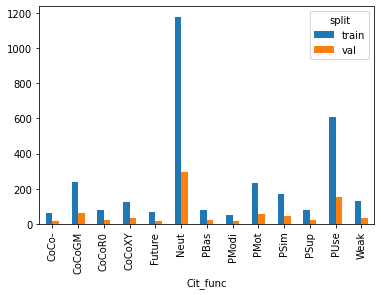

In [ ]:
final_citation.groupby(['Cit_func','split']).size().unstack(level=1)  
a=final_citation.groupby(['Cit_func','split']).size().unstack(level=1)  
a.plot(kind='bar')

In [ ]:
final_citation.groupby(['Cit_func','split']).size()

Cit_func  split
CoCo-     train      64
          val        16
CoCoGM    train     240
          val        60
CoCoR0    train      80
          val        20
CoCoXY    train     125
          val        31
Future    train      68
          val        17
Neut      train    1180
          val       295
PBas      train      81
          val        20
PModi     train      52
          val        13
PMot      train     232
          val        58
PSim      train     168
          val        42
PSup      train      80
          val        20
PUse      train     609
          val       152
Weak      train     128
          val        32
dtype: int64

In [ ]:
# final_citation.drop(final_citation.query('Cit_func == "CoCoGM" & split == "train"').sample(n=50).index,inplace=True)

In [ ]:
final_citation.drop(final_citation.query('Cit_func == "Neut" & split == "train"').sample(n=400).index,inplace=True)

In [ ]:
# final_citation.drop(final_citation.query('Cit_func == "PMot" & split == "train"').sample(n=50).index,inplace=True)

In [ ]:
final_citation.drop(final_citation.query('Cit_func == "PUse" & split == "train"').sample(n=200).index,inplace=True)

In [ ]:
# final_citation.drop(final_citation.query('Cit_func == "Neut" & split == "val"').sample(n=100).index,inplace=True)

In [ ]:
final_citation.groupby(['Cit_func','split']).size()

Cit_func  split
CoCo-     train     64
          val       16
CoCoGM    train    240
          val       60
CoCoR0    train     80
          val       20
CoCoXY    train    125
          val       31
Future    train     68
          val       17
Neut      train    780
          val      295
PBas      train     81
          val       20
PModi     train     52
          val       13
PMot      train    232
          val       58
PSim      train    168
          val       42
PSup      train     80
          val       20
PUse      train    409
          val      152
Weak      train    128
          val       32
dtype: int64

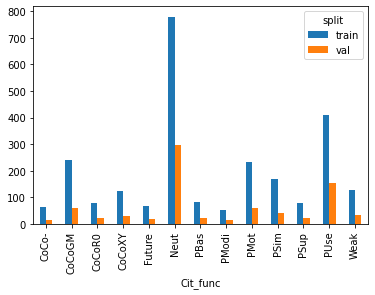

In [ ]:
final_citation.groupby(['Cit_func','split']).size().unstack(level=1)  
a=final_citation.groupby(['Cit_func','split']).size().unstack(level=1)  
a.plot(kind='bar')

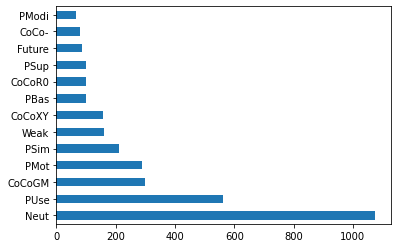

In [ ]:
 final_citation.Cit_func.value_counts().plot(kind='barh')

In [ ]:
display(final_citation.split.value_counts())

train    2507
val       776
Name: split, dtype: int64

In [ ]:
final_citation['Cit_func'].unique()

array(['CoCo-', 'CoCoGM', 'CoCoR0', 'CoCoXY', 'Future', 'Neut', 'PBas',
       'PModi', 'PMot', 'PSim', 'PSup', 'PUse', 'Weak'], dtype=object)

In [ ]:
# final_citation['Cit_func'].replace({"CoCo": "compare_contrast", "CoCo-": "compare_contrast","CoCoGM":"compare_contrast","CoCoR0":"compare_contrast","CoCoXY":"compare_contrast","PBas":"support",
#                                     "PModi":"support","PMot":"support","Psim":"support","PSup":"support","PUse":"support"}, inplace=True)

In [ ]:
class Vocabulary(object):
    """Class to process text and extract vocabulary for mapping"""

    def __init__(self, token_to_idx=None):
        """
        Args:
            token_to_idx (dict): a pre-existing map of tokens to indices
        """

        if token_to_idx is None:
            token_to_idx = {}
        self._token_to_idx = token_to_idx

        self._idx_to_token = {idx: token 
                              for token, idx in self._token_to_idx.items()}
        
    def to_serializable(self):
        """ returns a dictionary that can be serialized """
        return {'token_to_idx': self._token_to_idx}

    @classmethod
    def from_serializable(cls, contents):
        """ instantiates the Vocabulary from a serialized dictionary """
        return cls(**contents)

    def add_token(self, token):
        """Update mapping dicts based on the token.

        Args:
            token (str): the item to add into the Vocabulary
        Returns:
            index (int): the integer corresponding to the token
        """
        if token in self._token_to_idx:
            index = self._token_to_idx[token]
        else:
            index = len(self._token_to_idx)
            self._token_to_idx[token] = index
            self._idx_to_token[index] = token
        return index#,token
            
    def add_many(self, tokens):
        """Add a list of tokens into the Vocabulary
        
        Args:
            tokens (list): a list of string tokens
        Returns:
            indices (list): a list of indices corresponding to the tokens
        """
        return [self.add_token(token) for token in tokens]

    def lookup_token(self, token):
        """Retrieve the index associated with the token 
        
        Args:
            token (str): the token to look up 
        Returns:
            index (int): the index corresponding to the token
        """
        return self._token_to_idx[token]

    def lookup_index(self, index):
        """Return the token associated with the index
        
        Args: 
            index (int): the index to look up
        Returns:
            token (str): the token corresponding to the index
        Raises:
            KeyError: if the index is not in the Vocabulary
        """
        if index not in self._idx_to_token:
            raise KeyError("the index (%d) is not in the Vocabulary" % index)
        return self._idx_to_token[index]

    def __str__(self):
        return "<Vocabulary(size=%d)>" % len(self)

    def __len__(self):
        return len(self._token_to_idx)

In [ ]:
class SequenceVocabulary(Vocabulary):
    def __init__(self, token_to_idx=None, unk_token="<UNK>",
                 mask_token="<MASK>", begin_seq_token="<BEGIN>",
                 end_seq_token="<END>"):

        super(SequenceVocabulary, self).__init__(token_to_idx)

        self._mask_token = mask_token
        self._unk_token = unk_token
        self._begin_seq_token = begin_seq_token
        self._end_seq_token = end_seq_token

        self.mask_index = self.add_token(self._mask_token)
        self.unk_index = self.add_token(self._unk_token)
        self.begin_seq_index = self.add_token(self._begin_seq_token)
        self.end_seq_index = self.add_token(self._end_seq_token)

    def to_serializable(self):
        contents = super(SequenceVocabulary, self).to_serializable()
        contents.update({'unk_token': self._unk_token,
                         'mask_token': self._mask_token,
                         'begin_seq_token': self._begin_seq_token,
                         'end_seq_token': self._end_seq_token})
        return contents

    def lookup_token(self, token):
        """Retrieve the index associated with the token 
          or the UNK index if token isn't present.
        
        Args:
            token (str): the token to look up 
        Returns:
            index (int): the index corresponding to the token
        Notes:
            `unk_index` needs to be >=0 (having been added into the Vocabulary) 
              for the UNK functionality 
        """
        if self.unk_index >= 0:
            return self._token_to_idx.get(token, self.unk_index)
        else:
            return self._token_to_idx[token]

In [ ]:
class CitationVectorizer(object):
    """ The Vectorizer which coordinates the Vocabularies and puts them to use"""    
    def __init__(self, title_vocab, category_vocab):
        self.title_vocab = title_vocab
        self.category_vocab = category_vocab

    def vectorize(self, title, vector_length=-1):
        """
        Args:
            title (str): the string of words separated by a space
            vector_length (int): an argument for forcing the length of index vector
        Returns:
            the vetorized title (numpy.array)
        """
        indices = [self.title_vocab.begin_seq_index]
        indices.extend(self.title_vocab.lookup_token(token) 
                       for token in title)
        indices.append(self.title_vocab.end_seq_index)

        if vector_length < 0:
            vector_length = len(indices)

        out_vector = np.zeros(vector_length, dtype=np.int64)
        out_vector[:len(indices)] = indices
        out_vector[len(indices):] = self.title_vocab.mask_index
        return out_vector

    @classmethod
    def from_dataframe(cls, citation_df, cutoff=0):
        """Instantiate the vectorizer from the dataset dataframe
        
        Args:
            citation_df (pandas.DataFrame): the target dataset
            cutoff (int): frequency threshold for including in Vocabulary 
        Returns:
            an instance of the CitationVectorizer
        """
        category_vocab = Vocabulary()     
        for category in sorted(set(citation_df.Cit_func)):
            category_vocab.add_token(category)
            #a=category_vocab.add_token(category)
            #print(a)
        word_counts = Counter()
        for title in citation_df.Text_Tokens:
          # print("title is %s"%title)
          for token in title:
              # print("token is %s"%token)
              #if token not in string.punctuation:
              word_counts[token] += 1
        
        title_vocab = SequenceVocabulary()
        for word, word_count in word_counts.items():
            # print("word:word_count are %s:%d"%(word,word_count))
            if word_count >= cutoff:
                title_vocab.add_token(word)
        return cls(title_vocab, category_vocab)

    @classmethod
    def from_serializable(cls, contents):
        
        title_vocab = \
            SequenceVocabulary.from_serializable(contents['title_vocab'])
        category_vocab =  \
            Vocabulary.from_serializable(contents['category_vocab'])

        return cls(title_vocab=title_vocab, category_vocab=category_vocab)

    def to_serializable(self):
        return {'title_vocab': self.title_vocab.to_serializable(),
                'category_vocab': self.category_vocab.to_serializable()}

In [ ]:
class CitationDataset(Dataset):
    def __init__(self, citation_df, vectorizer):
        """
        Args:
            citation_df (pandas.DataFrame): the dataset
            vectorizer (CitationVectorizer): vectorizer instatiated from dataset
        """
        self.citation_df = citation_df
        self._vectorizer = vectorizer

        # +1 if only using begin_seq, +2 if using both begin and end seq tokens
        measure_len = lambda context: len(context)
        self._max_seq_length = max(map(measure_len, citation_df.Text_Tokens)) + 2
        

        self.train_df = self.citation_df[self.citation_df.split=='train']
        self.train_size = len(self.train_df)

        self.val_df = self.citation_df[self.citation_df.split=='val']
        self.validation_size = len(self.val_df)

        self.test_df = self.citation_df[self.citation_df.split=='test']
        self.test_size = len(self.test_df)

        self._lookup_dict = {'train': (self.train_df, self.train_size),
                             'val': (self.val_df, self.validation_size),
                             'test': (self.test_df, self.test_size)}

        self.set_split('train')

        # Class weights
        class_counts = citation_df.Cit_func.value_counts().to_dict()
        def sort_key(item):
            return self._vectorizer.category_vocab.lookup_token(item[0])
        sorted_counts = sorted(class_counts.items(), key=sort_key)
        frequencies = [count for _, count in sorted_counts]
        self.class_weights = 1.0 / torch.tensor(frequencies, dtype=torch.float32)

        
        
    @classmethod
    def load_dataset_and_make_vectorizer(cls, citation_csv):
        """Load dataset and make a new vectorizer from scratch
        
        Args:
            citation_csv (str): location of the dataset
        Returns:
            an instance of citationDataset
        """
        citation_df = citation_csv
        train_citation_df = citation_df[citation_df.split=='train']
        return cls(citation_df, CitationVectorizer.from_dataframe(train_citation_df))

    @classmethod
    def load_dataset_and_load_vectorizer(cls, citation_csv, vectorizer_filepath):
        """Load dataset and the corresponding vectorizer. 
        Used in the case in the vectorizer has been cached for re-use
        
        Args:
            surname_csv (str): location of the dataset
            vectorizer_filepath (str): location of the saved vectorizer
        Returns:
            an instance of SurnameDataset
        """
        
        citation_df = citation_csv
        vectorizer = cls.load_vectorizer_only(vectorizer_filepath)
        return cls(citation_csv, vectorizer)

    @staticmethod
    def load_vectorizer_only(vectorizer_filepath):
        """a static method for loading the vectorizer from file
        
        Args:
            vectorizer_filepath (str): the location of the serialized vectorizer
        Returns:
            an instance of functionVectorizer
        """
        with open(vectorizer_filepath) as fp:
            return NameVectorizer.from_serializable(json.load(fp))

    def save_vectorizer(self, vectorizer_filepath):
        """saves the vectorizer to disk using json
        
        Args:
            vectorizer_filepath (str): the location to save the vectorizer
        """
        with open(vectorizer_filepath, "w") as fp:
            json.dump(self._vectorizer.to_serializable(), fp)

    def get_vectorizer(self):
        """ returns the vectorizer """
        return self._vectorizer

    def set_split(self, split="train"):
        """ selects the splits in the dataset using a column in the dataframe """
        self._target_split = split
        self._target_df, self._target_size = self._lookup_dict[split]

    def __len__(self):
        return self._target_size

    def __getitem__(self, index):
        """the primary entry point method for PyTorch datasets
        
        Args:
            index (int): the index to the data point 
        Returns:
            a dictionary holding the data point's features (x_data) and label (y_target)
        """
        
        
        row = self._target_df.iloc[index]
        citseg= row.citseg_id

        title_vector = \
            self._vectorizer.vectorize(row.Text_Tokens, self._max_seq_length)

        category_index = \
            self._vectorizer.category_vocab.lookup_token(row.Cit_func)
        #print(category_index)

        return {'x_data': title_vector,
                'y_target': category_index,
                'citseg_id':citseg
                }

    def get_num_batches(self, batch_size):
        """Given a batch size, return the number of batches in the dataset
        
        Args:
            batch_size (int)
        Returns:
            number of batches in the dataset
        """
        return len(self) // batch_size

def generate_batches(dataset, batch_size, shuffle=True,
                     drop_last=True, device="cpu"): 

    # print("generate batches dataset")
    # print(dataset)
    """
    A generator function which wraps the PyTorch DataLoader. It will 
      ensure each tensor is on the write device location.
    """
    dataloader = DataLoader(dataset=dataset, batch_size=batch_size,
                            shuffle=shuffle, drop_last=drop_last)

    for data_dict in dataloader:
        # print('data_dict')
        # print(data_dict)
        out_data_dict = {}
        for name, tensor in data_dict.items():
            # print(name)
            # print(tensor)
            out_data_dict[name] = data_dict[name].to(device)
        yield out_data_dict

In [ ]:
# bilstm output of only citseg vector
import torch
import torch.nn as nn
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
class CitationClassifier1(nn.Module):
    def __init__(self, embedding_size, num_embeddings, num_layers, 
                 hidden_dim, num_classes, dropout_p, 
                 pretrained_embeddings=None, padding_idx=0):
      
        """
        Args:
            embedding_size (int): size of the embedding vectors
            num_embeddings (int): number of embedding vectors
            hidden_dim (int): the size of the hidden dimension
            num_classes (int): the number of classes in classification
            dropout_p (float): a dropout parameter 
            pretrained_embeddings (numpy.array): previously trained word embeddings
                default is None. If provided, 
            padding_idx (int): an index representing a null position
        """
        super(CitationClassifier1, self).__init__()
        self.hidden_dim = hidden_dim

        if pretrained_embeddings is None:

            self.emb = nn.Embedding(embedding_dim=embedding_size,
                                    num_embeddings=num_embeddings,
                                    padding_idx=padding_idx)        
        else:
            pretrained_embeddings = torch.from_numpy(pretrained_embeddings).float()
            self.emb = nn.Embedding(embedding_dim=embedding_size,
                                    num_embeddings=num_embeddings,
                                    padding_idx=padding_idx,
                                    _weight=pretrained_embeddings)
        
        self.lstm = nn.LSTM(embedding_size, hidden_dim,num_layers, bidirectional=True, batch_first=True)
        self.fc1 = nn.Linear(hidden_dim*2, 120)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(120, num_classes)
        self.act=nn.Softmax()
        


    def forward(self, x_in, citseg_id, apply_softmax=False):
        """The forward pass of the classifier
        
        Args:
            x_in (torch.Tensor): an input data tensor. 
                x_in.shape should be (batch, dataset._max_seq_length)
            apply_softmax (bool): a flag for the softmax activation
                should be false if used with the Cross Entropy losses
        Returns:
            the resulting tensor. tensor.shape should be (batch, num_classes)
        """
        batch_size = x_in.size(0)
        h_embedding = self.emb(x_in)

        packed_output, (hidden, cell) = self.lstm(h_embedding)
        packed_output=packed_output[torch.arange(packed_output.size(0)),citseg_id.long()]
        out = self.fc1(packed_output)
        out = self.relu(out)
        out = self.fc2(out)
        pred1= self.act(out)
        return pred1

In [ ]:
# bilstm(concat of citseg bilstm output + h_1 + h_n)
import torch
import torch.nn as nn
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
class CitationClassifier(nn.Module):
    def __init__(self, embedding_size, num_embeddings, num_layers, 
                 hidden_dim, num_classes, dropout_p, 
                 pretrained_embeddings=None, padding_idx=0):
      
        """
        Args:
            embedding_size (int): size of the embedding vectors
            num_embeddings (int): number of embedding vectors
            hidden_dim (int): the size of the hidden dimension
            num_classes (int): the number of classes in classification
            dropout_p (float): a dropout parameter 
            pretrained_embeddings (numpy.array): previously trained word embeddings
                default is None. If provided, 
            padding_idx (int): an index representing a null position
        """
        super(CitationClassifier, self).__init__()
        self.hidden_dim = hidden_dim

        if pretrained_embeddings is None:

            self.emb = nn.Embedding(embedding_dim=embedding_size,
                                    num_embeddings=num_embeddings,
                                    padding_idx=padding_idx)        
        else:
            pretrained_embeddings = torch.from_numpy(pretrained_embeddings).float()
            self.emb = nn.Embedding(embedding_dim=embedding_size,
                                    num_embeddings=num_embeddings,
                                    padding_idx=padding_idx,
                                    _weight=pretrained_embeddings)
        
        self.lstm = nn.LSTM(embedding_size, hidden_dim,num_layers, bidirectional=True, batch_first=True)
        self.fc1 = nn.Linear(hidden_dim*2*3, 120)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(120, num_classes)
        self.act=nn.Softmax()
        


    def forward(self, x_in, citseg_id, apply_softmax=False):
        """The forward pass of the classifier
        
        Args:
            x_in (torch.Tensor): an input data tensor. 
                x_in.shape should be (batch, dataset._max_seq_length)
            apply_softmax (bool): a flag for the softmax activation
                should be false if used with the Cross Entropy losses
        Returns:
            the resulting tensor. tensor.shape should be (batch, num_classes)
        """
        a = 0
        z = 192
        batch_size = x_in.size(0)
        h_embedding = self.emb(x_in)
        # print(h_embedding)

        packed_output, (hidden, cell) = self.lstm(h_embedding)
        h_1 = packed_output[torch.arange(packed_output.size(0)),a]
        h_n = packed_output[torch.arange(packed_output.size(0)),z]
        packed_output=packed_output[torch.arange(packed_output.size(0)),citseg_id.long()]
        h_1h_n=torch.cat([h_1,packed_output,h_n],dim=1)
        out = self.fc1(h_1h_n)
        out = self.relu(out)
        out = self.fc2(out)
        pred1= self.act(out)
        return pred1

In [ ]:
def make_train_state(args):
    return {'stop_early': False,
            'early_stopping_step': 0,
            'early_stopping_best_val': 1e8,
            'learning_rate': args.learning_rate,
            'epoch_index': 0,
            'train_loss': [],
            'train_acc': [],
            'val_loss': [],
            'val_acc': [],
            'test_loss': -1,
            'test_acc': -1,
            'model_filename': args.model_state_file}

def update_train_state(args, model, train_state):
    """Handle the training state updates.

    Components:
     - Early Stopping: Prevent overfitting.
     - Model Checkpoint: Model is saved if the model is better

    :param args: main arguments
    :param model: model to train
    :param train_state: a dictionary representing the training state values
    :returns:
        a new train_state
    """

    # Save one model at least
    if train_state['epoch_index'] == 0:
        torch.save(model.state_dict(), train_state['model_filename'])
        train_state['stop_early'] = False

    # Save model if performance improved
    elif train_state['epoch_index'] >= 1:
        loss_tm1, loss_t = train_state['val_loss'][-2:]

        # If loss worsened
        if loss_t >= train_state['early_stopping_best_val']:
            # Update step
            train_state['early_stopping_step'] += 1
        # Loss decreased
        else:
            # Save the best model
            if loss_t < train_state['early_stopping_best_val']:
                torch.save(model.state_dict(), train_state['model_filename'])

            # Reset early stopping step
            train_state['early_stopping_step'] = 0

        # Stop early ?
        train_state['stop_early'] = \
            train_state['early_stopping_step'] >= args.early_stopping_criteria

    return train_state

def compute_accuracy(y_pred, y_target):
    _, y_pred_indices = y_pred.max(dim=1)
    n_correct = torch.eq(y_pred_indices, y_target).sum().item()
    return n_correct / len(y_pred_indices) * 100

In [ ]:
def set_seed_everywhere(seed, cuda):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if cuda:
        torch.cuda.manual_seed_all(seed)

def handle_dirs(dirpath):
    if not os.path.exists(dirpath):
        os.makedirs(dirpath)
        
def load_glove_from_file(glove_filepath):
    """
    Load the GloVe embeddings 
    
    Args:
        glove_filepath (str): path to the glove embeddings file 
    Returns:
        word_to_index (dict), embeddings (numpy.ndarary)
    """

    word_to_index = {}
    embeddings = []
    with open(glove_filepath, "r") as fp:
        for index, line in enumerate(fp):
            line = line.split(" ") # each line: word num1 num2 ...
            word_to_index[line[0]] = index # word = line[0] 
            embedding_i = np.array([float(val) for val in line[1:]])
            embeddings.append(embedding_i)
    return word_to_index, np.stack(embeddings)

def make_embedding_matrix(glove_filepath, words):
    """
    Create embedding matrix for a specific set of words.
    
    Args:
        glove_filepath (str): file path to the glove embeddigns
        words (list): list of words in the dataset
    """
    word_to_idx, glove_embeddings = load_glove_from_file(glove_filepath)
    embedding_size = glove_embeddings.shape[1]
    final_embeddings = np.zeros((len(words), embedding_size))

    for i, word in enumerate(words):
        if word in word_to_idx:
            final_embeddings[i, :] = glove_embeddings[word_to_idx[word]]
        else:
            embedding_i = torch.ones(1, embedding_size)
            torch.nn.init.xavier_uniform_(embedding_i)
            final_embeddings[i, :] = embedding_i
    print(final_embeddings)
    print(final_embeddings.shape)
    return final_embeddings

In [ ]:
from argparse import Namespace

In [ ]:
args = Namespace(
    # Data and Path hyper parameters
    citation_csv=final_citation,
    vectorizer_file="vectorizer.json",
    model_state_file="model.pth",
    save_dir="model_storage/ch5/document_classification",
    # Model hyper parameters
    glove_filepath='/content/glove.6B.300d.txt', 
    use_glove=False,
    embedding_size=300, 
    hidden_dim=32,
    # Training hyper parameter
    seed=1337, 
    learning_rate=0.001, 
    dropout_p=0.1, 
    batch_size=30, 
    num_epochs=30, 
    num_layers=2,
    early_stopping_criteria=5, 
    # Runtime option
    cuda=True, 
    catch_keyboard_interrupt=True, 
    reload_from_files=False,
    expand_filepaths_to_save_dir=True
) 

if args.expand_filepaths_to_save_dir:
    args.vectorizer_file = os.path.join(args.save_dir,
                                        args.vectorizer_file)

    args.model_state_file = os.path.join(args.save_dir,
                                         args.model_state_file)
    
    print("Expanded filepaths: ")
    print("\t{}".format(args.vectorizer_file))
    print("\t{}".format(args.model_state_file))
    
# Check CUDA
if not torch.cuda.is_available():
    args.cuda = False
    
args.device = torch.device("cuda" if args.cuda else "cpu")
print("Using CUDA: {}".format(args.cuda))

# Set seed for reproducibility
set_seed_everywhere(args.seed, args.cuda)

# handle dirs
handle_dirs(args.save_dir)

Expanded filepaths: 
	model_storage/ch5/document_classification/vectorizer.json
	model_storage/ch5/document_classification/model.pth
Using CUDA: True


In [ ]:
args.use_glove = True

In [ ]:
if args.reload_from_files:
    # training from a checkpoint
    dataset = CitationDataset.load_dataset_and_load_vectorizer(args.citation_csv,
                                                              args.vectorizer_file)
else:
    # create dataset and vectorizer
    dataset = CitationDataset.load_dataset_and_make_vectorizer(args.citation_csv)
    dataset.save_vectorizer(args.vectorizer_file)
vectorizer = dataset.get_vectorizer()
print(len(vectorizer.title_vocab))
# Use GloVe or randomly initialized embeddings
if args.use_glove:
    words = vectorizer.title_vocab._token_to_idx.keys()
    embeddings = make_embedding_matrix(glove_filepath=args.glove_filepath, 
                                       words=words)
    print("Using pre-trained embeddings")
else:
    print("Not using pre-trained embeddings")
    embeddings = None

classifier = CitationClassifier(embedding_size=args.embedding_size, 
                            num_embeddings=len(vectorizer.title_vocab),
                            num_layers=args.num_layers,
                            hidden_dim=args.hidden_dim, 
                            num_classes=len(vectorizer.category_vocab), 
                            dropout_p=args.dropout_p,
                            pretrained_embeddings=embeddings,
                            padding_idx=0)

print(classifier)

7632
[[-0.11907164 -0.00123771  0.03475953 ...  0.10838436 -0.02188396
  -0.09059642]
 [-0.03658002  0.06027976 -0.01801901 ...  0.11394491 -0.03662597
  -0.09734906]
 [-0.07221913 -0.02466366 -0.03699218 ...  0.0299247  -0.07259606
  -0.04028996]
 ...
 [ 0.04125384  0.13328813  0.11181668 ... -0.13325182  0.04659251
   0.03860948]
 [-0.38506     0.094772    0.33281    ... -0.5335      0.2129
  -0.063519  ]
 [-0.22567     0.52341     0.27984    ... -0.27486     0.11941
  -0.34116   ]]
(7632, 300)
Using pre-trained embeddings
CitationClassifier(
  (emb): Embedding(7632, 300, padding_idx=0)
  (lstm): LSTM(300, 32, num_layers=2, batch_first=True, bidirectional=True)
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=120, out_features=13, bias=True)
  (act): Softmax(dim=None)
)


In [ ]:
embeddings.shape

(7632, 300)

In [ ]:
predictions=[]
prediction=[]
y=[]
classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
    
loss_func = nn.CrossEntropyLoss(dataset.class_weights)
optimizer = optim.RMSprop(classifier.parameters(), lr=args.learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,
                                           mode='min', factor=0.5,
                                           patience=1)

train_state = make_train_state(args)

epoch_bar = tqdm_notebook(desc='training routine', 
                          total=args.num_epochs,
                          position=0)

dataset.set_split('train')
train_bar = tqdm_notebook(desc='split=train',
                          total=dataset.get_num_batches(args.batch_size), 
                          position=1, 
                          leave=True)
dataset.set_split('val')
val_bar = tqdm_notebook(desc='split=val',
                        total=dataset.get_num_batches(args.batch_size), 
                        position=1, 
                        leave=True)

try:
    for epoch_index in range(args.num_epochs):
        train_state['epoch_index'] = epoch_index

        # Iterate over training dataset

        # setup: batch generator, set loss and acc to 0, set train mode on

        dataset.set_split('train')
        batch_generator = generate_batches(dataset, 
                                           batch_size=args.batch_size, 
                                           device=args.device)
        running_loss = 0.0
        running_acc = 0.0
        classifier.train()

        for batch_index, batch_dict in enumerate(batch_generator):
            # the training routine is these 5 steps:

            # --------------------------------------
            # step 1. zero the gradients
            optimizer.zero_grad()

            # step 2. compute the output
            y_pred = classifier(batch_dict['x_data'],batch_dict['citseg_id'])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict['y_target'])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            # step 4. use loss to produce gradients
            loss.backward()

            # step 5. use optimizer to take gradient step
            optimizer.step()
            # -----------------------------------------
            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict['y_target'])
            running_acc += (acc_t - running_acc) / (batch_index + 1)

            # update bar
            train_bar.set_postfix(loss=running_loss, acc=running_acc, 
                                  epoch=epoch_index)
            train_bar.update()

        train_state['train_loss'].append(running_loss)
        train_state['train_acc'].append(running_acc)

        # Iterate over val dataset

        # setup: batch generator, set loss and acc to 0; set eval mode on
        dataset.set_split('val')
        batch_generator = generate_batches(dataset, 
                                           batch_size=args.batch_size, 
                                           device=args.device)
        running_loss = 0.
        running_acc = 0.
        classifier.eval()

        for batch_index, batch_dict in enumerate(batch_generator):

            # compute the output
            y_pred =  classifier(batch_dict['x_data'],batch_dict['citseg_id'])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict['y_target'])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            _, predictions = y_pred.max(dim=1)
            prediction.append(predictions)
            y.append(batch_dict['y_target'])

            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict['y_target'])
            
            running_acc += (acc_t - running_acc) / (batch_index + 1)
            val_bar.set_postfix(loss=running_loss, acc=running_acc, 
                            epoch=epoch_index)
            val_bar.update()
        print('Epoch {}\t val_loss={}\t val_acc={}'.format(epoch_index, running_loss, running_acc))

        train_state['val_loss'].append(running_loss)
        train_state['val_acc'].append(running_acc)
        # print("Test loss: {};".format(train_state['val_loss']))
        # print("Test Accuracy: {}".format(train_state['val_acc']))

        train_state = update_train_state(args=args, model=classifier,
                                         train_state=train_state)

        scheduler.step(train_state['val_loss'][-1])

        if train_state['stop_early']:
            break

        train_bar.n = 0
        val_bar.n = 0
        epoch_bar.update()
except KeyboardInterrupt:
    print("Exiting loop")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


training routine:   0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=train:   0%|          | 0/83 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=val:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 0	 val_loss=2.56286581993103	 val_acc=3.7333333333333334
Epoch 1	 val_loss=2.5414102268218994	 val_acc=6.533333333333332
Epoch 2	 val_loss=2.4838652324676516	 val_acc=9.600000000000001
Epoch 3	 val_loss=2.47129451751709	 val_acc=10.8
Epoch 4	 val_loss=2.4273679161071775	 val_acc=17.333333333333336
Epoch 5	 val_loss=2.4204561138153076	 val_acc=21.599999999999998
Epoch 6	 val_loss=2.3976649665832515	 val_acc=24.93333333333333
Epoch 7	 val_loss=2.413254041671753	 val_acc=25.466666666666665
Epoch 8	 val_loss=2.41802526473999	 val_acc=28.8
Epoch 9	 val_loss=2.383553037643433	 val_acc=30.0
Epoch 10	 val_loss=2.392910261154175	 val_acc=31.733333333333334
Epoch 11	 val_loss=2.3990783119201664	 val_acc=32.4
Epoch 12	 val_loss=2.387638263702393	 val_acc=34.13333333333333
Epoch 13	 val_loss=2.378132209777832	 val_acc=35.86666666666666
Epoch 14	 val_loss=2.3777464008331295	 val_acc=35.06666666666667
Epoch 15	 val_loss=2.3693391036987297	 val_acc=36.0
Epoch 16	 val_loss=2.382448282241821	 val

In [ ]:
print("val loss: {};".format(train_state['val_loss']))
print("val Accuracy: {}".format(train_state['val_acc']))

val loss: [2.56286581993103, 2.5414102268218994, 2.4838652324676516, 2.47129451751709, 2.4273679161071775, 2.4204561138153076, 2.3976649665832515, 2.413254041671753, 2.41802526473999, 2.383553037643433, 2.392910261154175, 2.3990783119201664, 2.387638263702393, 2.378132209777832, 2.3777464008331295, 2.3693391036987297, 2.382448282241821, 2.3778346252441414, 2.368254899978637, 2.3703229236602783, 2.380125875473022, 2.3802189540863035, 2.3675639533996584, 2.3681451892852783, 2.371677875518799, 2.374697694778442, 2.3740308094024654, 2.3824589920043944, 2.3733948326110843, 2.3662462997436524];
val Accuracy: [3.7333333333333334, 6.533333333333332, 9.600000000000001, 10.8, 17.333333333333336, 21.599999999999998, 24.93333333333333, 25.466666666666665, 28.8, 30.0, 31.733333333333334, 32.4, 34.13333333333333, 35.86666666666666, 35.06666666666667, 36.0, 35.599999999999994, 36.8, 37.06666666666666, 36.93333333333332, 35.599999999999994, 33.86666666666666, 35.199999999999996, 34.66666666666666, 34.

In [ ]:
# compute the loss & accuracy on the test set using the best available model

classifier.load_state_dict(torch.load(train_state['model_filename']))

classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
loss_func = nn.CrossEntropyLoss(dataset.class_weights)

dataset.set_split('val')
batch_generator = generate_batches(dataset, 
                                   batch_size=args.batch_size, 
                                   device=args.device)
running_loss = 0.
running_acc = 0.
classifier.eval()
predictions=[]
prediction=[]
y=[]

for batch_index, batch_dict in enumerate(batch_generator):
    # compute the output
    y_pred =  classifier(batch_dict['x_data'],batch_dict['citseg_id'])

    
    # compute the loss
    loss = loss_func(y_pred, batch_dict['y_target'])
    loss_t = loss.item()
    running_loss += (loss_t - running_loss) / (batch_index + 1)
    _, predictions = y_pred.max(dim=1)
    prediction.append(predictions)
    y.append(batch_dict['y_target'])
    # compute the accuracy
    acc_t = compute_accuracy(y_pred, batch_dict['y_target'])
    running_acc += (acc_t - running_acc) / (batch_index + 1)

train_state['test_loss'] = running_loss
train_state['test_acc'] = running_acc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
y_tensor = torch.stack(y)
pred_tensor = torch.stack(prediction)

In [ ]:
true_y=y_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_tensor.cpu().detach().numpy()

In [ ]:
true_y.shape

(25, 30)

In [ ]:
pred_y=pred_y.flatten()

In [ ]:
true_y=true_y.flatten()

In [ ]:
from sklearn.metrics import classification_report
target_names = ["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"]
#target_names = ["Future","Neut","PSim","compare_contrast","support"]
print(classification_report(true_y, pred_y, target_names=target_names))

              precision    recall  f1-score   support

       CoCo-       0.21      0.33      0.26        15
      CoCoGM       0.10      0.22      0.14        58
      CoCoR0       0.50      0.25      0.33        20
      CoCoXY       0.28      0.28      0.28        29
      Future       0.37      0.44      0.40        16
        Neut       0.54      0.37      0.44       289
        PBas       0.17      0.15      0.16        20
       PModi       0.13      0.31      0.19        13
        PMot       0.37      0.40      0.38        55
        PSim       0.38      0.36      0.37        39
        PSup       0.09      0.11      0.10        18
        PUse       0.42      0.35      0.39       147
        Weak       0.24      0.39      0.30        31

    accuracy                           0.34       750
   macro avg       0.29      0.30      0.29       750
weighted avg       0.40      0.34      0.36       750



In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(true_y, pred_y)

In [ ]:
cf_matrix

array([[  5,   1,   0,   1,   0,   1,   0,   1,   3,   2,   0,   1,   0],
       [  3,  13,   1,   2,   0,  15,   1,   2,   3,   3,   1,   8,   6],
       [  3,   2,   5,   0,   0,   2,   0,   0,   4,   1,   2,   1,   0],
       [  3,   4,   0,   8,   0,   6,   0,   0,   0,   1,   2,   3,   2],
       [  1,   0,   0,   0,   7,   4,   1,   0,   0,   0,   3,   0,   0],
       [  5,  58,   2,  12,   4, 107,   5,   5,  19,   5,   8,  38,  21],
       [  0,   6,   0,   1,   0,   3,   3,   2,   0,   0,   0,   4,   1],
       [  0,   0,   0,   0,   1,   1,   2,   4,   0,   0,   0,   5,   0],
       [  1,   6,   0,   0,   2,  10,   2,   0,  22,   1,   4,   4,   3],
       [  0,   6,   0,   0,   1,   8,   0,   5,   2,  14,   0,   3,   0],
       [  1,   3,   0,   0,   0,   6,   1,   1,   1,   1,   2,   1,   1],
       [  2,  28,   2,   5,   3,  29,   3,  10,   3,   6,   1,  52,   3],
       [  0,   2,   0,   0,   1,   7,   0,   0,   3,   3,   0,   3,  12]])

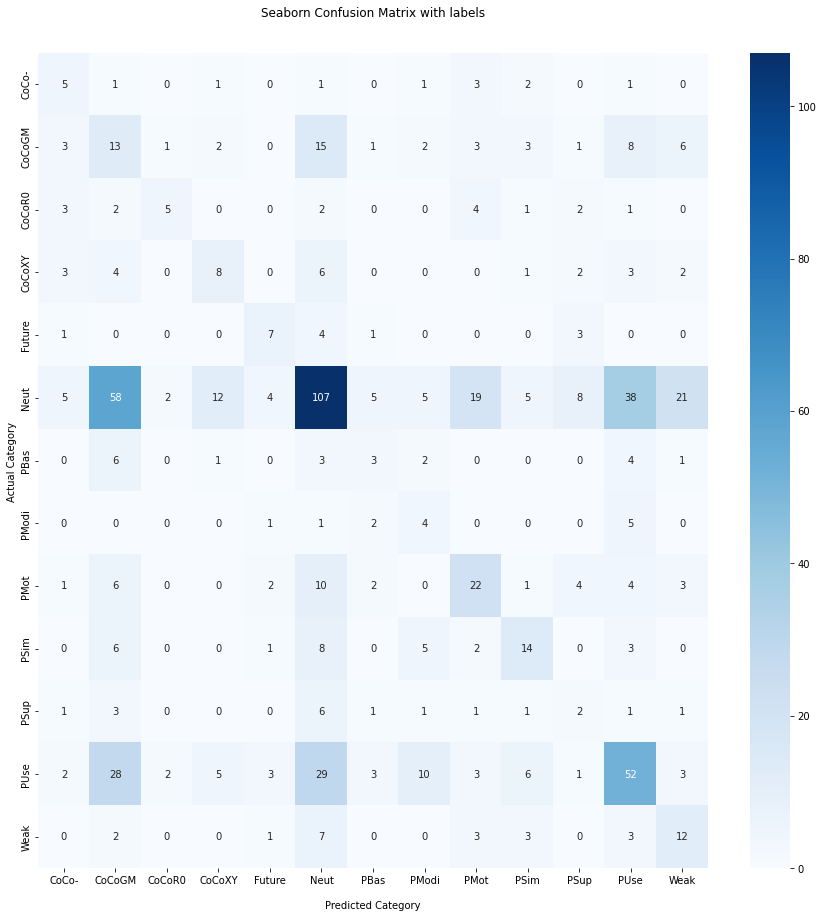

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"])
ax.yaxis.set_ticklabels(["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
def make_train_state(args):
    return {'stop_early': False,
            'early_stopping_step': 0,
            'early_stopping_best_val': 1e8,
            'learning_rate': args.learning_rate,
            'epoch_index': 0,
            'train_loss': [],
            'train_acc': [],
            'val_loss': [],
            'val_acc': [],
            'test_loss': -1,
            'test_acc': -1,
            'model_filename': args.model_state_file}

def update_train_state(args, model, train_state):
    """Handle the training state updates.

    Components:
     - Early Stopping: Prevent overfitting.
     - Model Checkpoint: Model is saved if the model is better

    :param args: main arguments
    :param model: model to train
    :param train_state: a dictionary representing the training state values
    :returns:
        a new train_state
    """

    # Save one model at least
    if train_state['epoch_index'] == 0:
        torch.save(model.state_dict(), train_state['model_filename'])
        train_state['stop_early'] = False

    # Save model if performance improved
    elif train_state['epoch_index'] >= 1:
        loss_tm1, loss_t = train_state['val_loss'][-2:]

        # If loss worsened
        if loss_t >= train_state['early_stopping_best_val']:
            # Update step
            train_state['early_stopping_step'] += 1
        # Loss decreased
        else:
            # Save the best model
            if loss_t < train_state['early_stopping_best_val']:
                torch.save(model.state_dict(), train_state['model_filename'])

            # Reset early stopping step
            train_state['early_stopping_step'] = 0

        # Stop early ?
        train_state['stop_early'] = \
            train_state['early_stopping_step'] >= args.early_stopping_criteria

    return train_state

def compute_accuracy(y_pred, y_target):
    _, y_pred_indices = y_pred.max(dim=1)
    n_correct = torch.eq(y_pred_indices, y_target).sum().item()
    return n_correct / len(y_pred_indices) * 100

In [ ]:
classifier = CitationClassifier1(embedding_size=args.embedding_size, 
                            num_embeddings=len(vectorizer.title_vocab),
                            num_layers=args.num_layers,
                            hidden_dim=args.hidden_dim, 
                            num_classes=len(vectorizer.category_vocab), 
                            dropout_p=args.dropout_p,
                            pretrained_embeddings=embeddings,
                            padding_idx=0)

print(classifier)

CitationClassifier1(
  (emb): Embedding(7632, 300, padding_idx=0)
  (lstm): LSTM(300, 32, num_layers=2, batch_first=True, bidirectional=True)
  (fc1): Linear(in_features=64, out_features=120, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=120, out_features=13, bias=True)
  (act): Softmax(dim=None)
)


In [ ]:
predictions=[]
prediction=[]
y=[]
classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
    
loss_func = nn.CrossEntropyLoss(dataset.class_weights)
optimizer = optim.RMSprop(classifier.parameters(), lr=args.learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,
                                           mode='min', factor=0.5,
                                           patience=1)

train_state = make_train_state(args)

epoch_bar = tqdm_notebook(desc='training routine', 
                          total=args.num_epochs,
                          position=0)

dataset.set_split('train')
train_bar = tqdm_notebook(desc='split=train',
                          total=dataset.get_num_batches(args.batch_size), 
                          position=1, 
                          leave=True)
dataset.set_split('val')
val_bar = tqdm_notebook(desc='split=val',
                        total=dataset.get_num_batches(args.batch_size), 
                        position=1, 
                        leave=True)

try:
    for epoch_index in range(args.num_epochs):
        train_state['epoch_index'] = epoch_index

        # Iterate over training dataset

        # setup: batch generator, set loss and acc to 0, set train mode on

        dataset.set_split('train')
        batch_generator = generate_batches(dataset, 
                                           batch_size=args.batch_size, 
                                           device=args.device)
        running_loss = 0.0
        running_acc = 0.0
        classifier.train()

        for batch_index, batch_dict in enumerate(batch_generator):
            # the training routine is these 5 steps:

            # --------------------------------------
            # step 1. zero the gradients
            optimizer.zero_grad()

            # step 2. compute the output
            y_pred = classifier(batch_dict['x_data'],batch_dict['citseg_id'])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict['y_target'])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            # step 4. use loss to produce gradients
            loss.backward()

            # step 5. use optimizer to take gradient step
            optimizer.step()
            # -----------------------------------------
            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict['y_target'])
            running_acc += (acc_t - running_acc) / (batch_index + 1)

            # update bar
            train_bar.set_postfix(loss=running_loss, acc=running_acc, 
                                  epoch=epoch_index)
            train_bar.update()

        train_state['train_loss'].append(running_loss)
        train_state['train_acc'].append(running_acc)

        # Iterate over val dataset

        # setup: batch generator, set loss and acc to 0; set eval mode on
        dataset.set_split('val')
        batch_generator = generate_batches(dataset, 
                                           batch_size=args.batch_size, 
                                           device=args.device)
        running_loss = 0.
        running_acc = 0.
        classifier.eval()

        for batch_index, batch_dict in enumerate(batch_generator):

            # compute the output
            y_pred =  classifier(batch_dict['x_data'],batch_dict['citseg_id'])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict['y_target'])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            _, predictions = y_pred.max(dim=1)
            prediction.append(predictions)
            y.append(batch_dict['y_target'])

            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict['y_target'])
            
            running_acc += (acc_t - running_acc) / (batch_index + 1)
            val_bar.set_postfix(loss=running_loss, acc=running_acc, 
                            epoch=epoch_index)
            val_bar.update()
        print('Epoch {}\t val_loss={}\t val_acc={}'.format(epoch_index, running_loss, running_acc))

        train_state['val_loss'].append(running_loss)
        train_state['val_acc'].append(running_acc)
        # print("Test loss: {};".format(train_state['val_loss']))
        # print("Test Accuracy: {}".format(train_state['val_acc']))

        train_state = update_train_state(args=args, model=classifier,
                                         train_state=train_state)

        scheduler.step(train_state['val_loss'][-1])

        if train_state['stop_early']:
            break

        train_bar.n = 0
        val_bar.n = 0
        epoch_bar.update()
except KeyboardInterrupt:
    print("Exiting loop")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


training routine:   0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=train:   0%|          | 0/83 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=val:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 0	 val_loss=2.5432825469970703	 val_acc=7.466666666666669
Epoch 1	 val_loss=2.528827552795411	 val_acc=8.4
Epoch 2	 val_loss=2.517270126342774	 val_acc=11.333333333333334
Epoch 3	 val_loss=2.511008539199829	 val_acc=13.466666666666667
Epoch 4	 val_loss=2.50895586013794	 val_acc=15.6
Epoch 5	 val_loss=2.490521793365478	 val_acc=20.799999999999994
Epoch 6	 val_loss=2.4817912006378178	 val_acc=26.266666666666662
Epoch 7	 val_loss=2.4643135738372806	 val_acc=28.0
Epoch 8	 val_loss=2.47012752532959	 val_acc=25.733333333333338
Epoch 9	 val_loss=2.4475084304809567	 val_acc=26.399999999999995
Epoch 10	 val_loss=2.4447903919219973	 val_acc=26.0
Epoch 11	 val_loss=2.4378349590301513	 val_acc=29.199999999999996
Epoch 12	 val_loss=2.4686098003387453	 val_acc=26.666666666666668
Epoch 13	 val_loss=2.436258068084717	 val_acc=26.933333333333334
Epoch 14	 val_loss=2.439847259521485	 val_acc=26.666666666666668
Epoch 15	 val_loss=2.427940607070923	 val_acc=29.066666666666666
Epoch 16	 val_loss=2.43

In [ ]:
# compute the loss & accuracy on the test set using the best available model

classifier.load_state_dict(torch.load(train_state['model_filename']))

classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
loss_func = nn.CrossEntropyLoss(dataset.class_weights)

dataset.set_split('val')
batch_generator = generate_batches(dataset, 
                                   batch_size=args.batch_size, 
                                   device=args.device)
running_loss = 0.
running_acc = 0.
classifier.eval()
predictions=[]
prediction=[]
y=[]

for batch_index, batch_dict in enumerate(batch_generator):
    # compute the output
    y_pred =  classifier(batch_dict['x_data'],batch_dict['citseg_id'])

    
    # compute the loss
    loss = loss_func(y_pred, batch_dict['y_target'])
    loss_t = loss.item()
    running_loss += (loss_t - running_loss) / (batch_index + 1)
    _, predictions = y_pred.max(dim=1)
    prediction.append(predictions)
    y.append(batch_dict['y_target'])
    # compute the accuracy
    acc_t = compute_accuracy(y_pred, batch_dict['y_target'])
    running_acc += (acc_t - running_acc) / (batch_index + 1)

train_state['test_loss'] = running_loss
train_state['test_acc'] = running_acc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
y_tensor = torch.stack(y)
pred_tensor = torch.stack(prediction)

In [ ]:
true_y=y_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_y.flatten()

In [ ]:
true_y=true_y.flatten()

In [ ]:
from sklearn.metrics import classification_report
target_names = ["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"]
#target_names = ["Future","Neut","PSim","compare_contrast","support"]
print(classification_report(true_y, pred_y, target_names=target_names))

              precision    recall  f1-score   support

       CoCo-       0.50      0.31      0.38        16
      CoCoGM       0.29      0.25      0.27        59
      CoCoR0       0.26      0.25      0.26        20
      CoCoXY       0.11      0.41      0.17        29
      Future       0.12      0.06      0.08        16
        Neut       0.62      0.31      0.42       284
        PBas       0.04      0.11      0.06        19
       PModi       0.06      0.08      0.07        12
        PMot       0.32      0.38      0.34        56
        PSim       0.50      0.41      0.45        41
        PSup       0.04      0.20      0.07        20
        PUse       0.50      0.42      0.46       146
        Weak       0.24      0.22      0.23        32

    accuracy                           0.32       750
   macro avg       0.28      0.26      0.25       750
weighted avg       0.44      0.32      0.36       750



In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(true_y, pred_y)

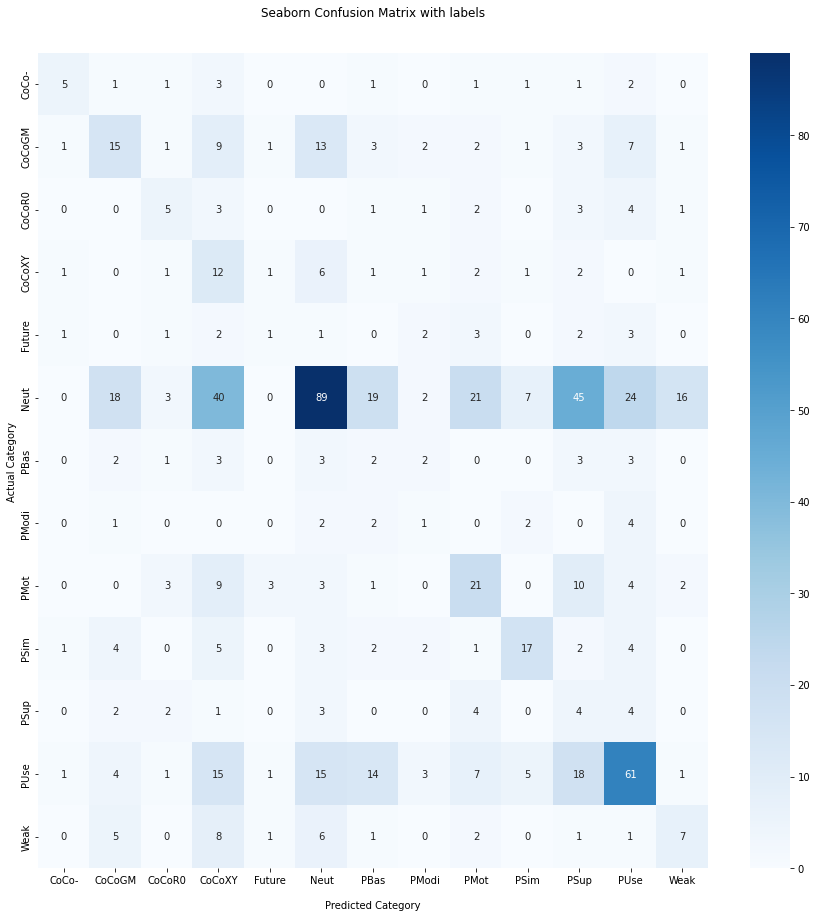

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"])
ax.yaxis.set_ticklabels(["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
#if you could generate a global attentive sentence vector and use that for classsification
import torch
import torch.nn as nn
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
class Attention(nn.Module):
    def __init__(self, feature_dim, step_dim, bias=True, **kwargs):
        super(Attention, self).__init__(**kwargs)
        
        self.supports_masking = True

        self.bias = bias
        self.feature_dim = feature_dim
        self.step_dim = step_dim
        self.features_dim = 0
        
        weight = torch.zeros(feature_dim, 1)
        nn.init.kaiming_uniform_(weight)
        self.weight = nn.Parameter(weight)
        
        if bias:
            self.b = nn.Parameter(torch.zeros(step_dim))
        
    def forward(self, x, mask=None):
        # print("x.shape")
        # print(x.shape)
        feature_dim = self.feature_dim 
        # print(feature_dim)
        step_dim = self.step_dim
        # print(step_dim)

        eij = torch.mm(x.contiguous().view(-1, feature_dim), self.weight).view(-1, step_dim)
        # print("eij.shape")
        # print(eij.shape)
        
        if self.bias:
            eij = eij + self.b
            
        eij = torch.tanh(eij)
        a = torch.exp(eij)
        
        if mask is not None:
            a = a * mask

        a = a / (torch.sum(a, 1, keepdim=True) + 1e-10)

        weighted_input = x * torch.unsqueeze(a, -1)
        sum= torch.sum(weighted_input, 1)
        return sum

class CitationClassifier(nn.Module):
    def __init__(self, embedding_size, num_embeddings, num_layers, 
                 hidden_dim, num_classes, dropout_p, 
                 pretrained_embeddings=None, padding_idx=0):
      
        """
        Args:
            embedding_size (int): size of the embedding vectors
            num_embeddings (int): number of embedding vectors
            hidden_dim (int): the size of the hidden dimension
            num_classes (int): the number of classes in classification
            dropout_p (float): a dropout parameter 
            pretrained_embeddings (numpy.array): previously trained word embeddings
                default is None. If provided, 
            padding_idx (int): an index representing a null position
        """
        super(CitationClassifier, self).__init__()
        self.hidden_dim = hidden_dim

        if pretrained_embeddings is None:

            self.emb = nn.Embedding(embedding_dim=embedding_size,
                                    num_embeddings=num_embeddings,
                                    padding_idx=padding_idx)        
        else:
            pretrained_embeddings = torch.from_numpy(pretrained_embeddings).float()
            self.emb = nn.Embedding(embedding_dim=embedding_size,
                                    num_embeddings=num_embeddings,
                                    padding_idx=padding_idx,
                                    _weight=pretrained_embeddings)
        
        self.lstm = nn.LSTM(embedding_size, hidden_dim,num_layers, bidirectional=True, batch_first=True)
        self.attention_layer = Attention(hidden_dim*2, 193)
        self.fc1 = nn.Linear(hidden_dim*2, 50)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(50, num_classes)
        self.act=nn.Softmax()
        


    def forward(self, x_in, citseg_id, apply_softmax=False):
        """The forward pass of the classifier
        
        Args:
            x_in (torch.Tensor): an input data tensor. 
                x_in.shape should be (batch, dataset._max_seq_length)
            apply_softmax (bool): a flag for the softmax activation
                should be false if used with the Cross Entropy losses
        Returns:
            the resulting tensor. tensor.shape should be (batch, num_classes)
        """
        batch_size = x_in.size(0)
        seq_length =  x_in.size(1)
        h_embedding = self.emb(x_in)
        # print(h_embedding.shape) 
        packed_output, (hidden, cell) = self.lstm(h_embedding)
        # print(packed_output.shape)
        packed_output = self.attention_layer(packed_output)
        #packed_output=packed_output[torch.arange(packed_output.size(0)),citseg_id.long()]
        #h_1h_n=torch.cat([packed_output,packed_output1],dim=1)
        out = self.fc1(packed_output)
        # print(out.shape)
        out = self.relu(out)
        # print(out.shape)
        out = self.fc2(out)
        # print(out.shape)
        pred1= self.act(out)
        # print(pred1.shape)
        return pred1

In [ ]:
classifier = CitationClassifier(embedding_size=args.embedding_size, 
                            num_embeddings=len(vectorizer.title_vocab),
                            num_layers=args.num_layers,
                            hidden_dim=args.hidden_dim, 
                            num_classes=len(vectorizer.category_vocab), 
                            dropout_p=args.dropout_p,
                            pretrained_embeddings=embeddings,
                            padding_idx=0)

print(classifier)

CitationClassifier(
  (emb): Embedding(7632, 300, padding_idx=0)
  (lstm): LSTM(300, 32, num_layers=2, batch_first=True, bidirectional=True)
  (attention_layer): Attention()
  (fc1): Linear(in_features=64, out_features=50, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=50, out_features=13, bias=True)
  (act): Softmax(dim=None)
)


In [ ]:
predictions=[]
prediction=[]
y=[]
classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
    
loss_func = nn.CrossEntropyLoss(dataset.class_weights)
optimizer = optim.RMSprop(classifier.parameters(), lr=args.learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,
                                           mode='min', factor=0.5,
                                           patience=1)

train_state = make_train_state(args)

epoch_bar = tqdm_notebook(desc='training routine', 
                          total=args.num_epochs,
                          position=0)

dataset.set_split('train')
train_bar = tqdm_notebook(desc='split=train',
                          total=dataset.get_num_batches(args.batch_size), 
                          position=1, 
                          leave=True)
dataset.set_split('val')
val_bar = tqdm_notebook(desc='split=val',
                        total=dataset.get_num_batches(args.batch_size), 
                        position=1, 
                        leave=True)

try:
    for epoch_index in range(args.num_epochs):
        train_state['epoch_index'] = epoch_index

        # Iterate over training dataset

        # setup: batch generator, set loss and acc to 0, set train mode on

        dataset.set_split('train')
        batch_generator = generate_batches(dataset, 
                                           batch_size=args.batch_size, 
                                           device=args.device)
        running_loss = 0.0
        running_acc = 0.0
        classifier.train()

        for batch_index, batch_dict in enumerate(batch_generator):
            # the training routine is these 5 steps:

            # --------------------------------------
            # step 1. zero the gradients
            optimizer.zero_grad()
            # step 2. compute the output
            y_pred = classifier(batch_dict['x_data'],batch_dict['citseg_id'])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict['y_target'])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            # step 4. use loss to produce gradients
            loss.backward()

            # step 5. use optimizer to take gradient step
            optimizer.step()
            # -----------------------------------------
            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict['y_target'])
            running_acc += (acc_t - running_acc) / (batch_index + 1)

            # update bar
            train_bar.set_postfix(loss=running_loss, acc=running_acc, 
                                  epoch=epoch_index)
            train_bar.update()

        train_state['train_loss'].append(running_loss)
        train_state['train_acc'].append(running_acc)

        # Iterate over val dataset

        # setup: batch generator, set loss and acc to 0; set eval mode on
        dataset.set_split('val')
        batch_generator = generate_batches(dataset, 
                                           batch_size=args.batch_size, 
                                           device=args.device)
        running_loss = 0.
        running_acc = 0.
        classifier.eval()

        for batch_index, batch_dict in enumerate(batch_generator):

            # compute the output
            y_pred =  classifier(batch_dict['x_data'],batch_dict['citseg_id'])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict['y_target'])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            _, predictions = y_pred.max(dim=1)
            prediction.append(predictions)
            y.append(batch_dict['y_target'])

            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict['y_target'])
            
            running_acc += (acc_t - running_acc) / (batch_index + 1)
            val_bar.set_postfix(loss=running_loss, acc=running_acc, 
                            epoch=epoch_index)
            val_bar.update()
        print('Epoch {}\t val_loss={}\t val_acc={}'.format(epoch_index, running_loss, running_acc))

        train_state['val_loss'].append(running_loss)
        train_state['val_acc'].append(running_acc)
        # print("Test loss: {};".format(train_state['val_loss']))
        # print("Test Accuracy: {}".format(train_state['val_acc']))

        train_state = update_train_state(args=args, model=classifier,
                                         train_state=train_state)

        scheduler.step(train_state['val_loss'][-1])

        if train_state['stop_early']:
            break

        train_bar.n = 0
        val_bar.n = 0
        epoch_bar.update()
except KeyboardInterrupt:
    print("Exiting loop")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


training routine:   0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=train:   0%|          | 0/83 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=val:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 0	 val_loss=2.5647956943511967	 val_acc=3.066666666666667
Epoch 1	 val_loss=2.5533999061584467	 val_acc=4.666666666666667
Epoch 2	 val_loss=2.5298042201995843	 val_acc=7.6
Epoch 3	 val_loss=2.5108005809783944	 val_acc=8.933333333333334
Epoch 4	 val_loss=2.50121747970581	 val_acc=8.933333333333334
Epoch 5	 val_loss=2.542358732223511	 val_acc=7.2
Epoch 6	 val_loss=2.4685008335113534	 val_acc=13.599999999999998
Epoch 7	 val_loss=2.446634645462036	 val_acc=16.133333333333326
Epoch 8	 val_loss=2.452825422286987	 val_acc=14.533333333333331
Epoch 9	 val_loss=2.428195552825928	 val_acc=17.466666666666665
Epoch 10	 val_loss=2.4251048469543455	 val_acc=17.200000000000003
Epoch 11	 val_loss=2.431518526077271	 val_acc=17.466666666666672
Epoch 12	 val_loss=2.4325719451904293	 val_acc=18.13333333333333
Epoch 13	 val_loss=2.4129562187194815	 val_acc=20.799999999999997
Epoch 14	 val_loss=2.408481502532959	 val_acc=23.599999999999998
Epoch 15	 val_loss=2.413336248397827	 val_acc=24.66666666666666

In [ ]:
# compute the loss & accuracy on the test set using the best available model

classifier.load_state_dict(torch.load(train_state['model_filename']))

classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
loss_func = nn.CrossEntropyLoss(dataset.class_weights)

dataset.set_split('val')
batch_generator = generate_batches(dataset, 
                                   batch_size=args.batch_size, 
                                   device=args.device)
running_loss = 0.
running_acc = 0.
classifier.eval()
predictions=[]
prediction=[]
y=[]

for batch_index, batch_dict in enumerate(batch_generator):
    # compute the output
    y_pred =  classifier(batch_dict['x_data'],batch_dict['citseg_id'])

    
    # compute the loss
    loss = loss_func(y_pred, batch_dict['y_target'])
    loss_t = loss.item()
    running_loss += (loss_t - running_loss) / (batch_index + 1)
    _, predictions = y_pred.max(dim=1)
    prediction.append(predictions)
    y.append(batch_dict['y_target'])
    # compute the accuracy
    acc_t = compute_accuracy(y_pred, batch_dict['y_target'])
    running_acc += (acc_t - running_acc) / (batch_index + 1)

train_state['test_loss'] = running_loss
train_state['test_acc'] = running_acc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
y_tensor = torch.stack(y)
pred_tensor = torch.stack(prediction)

In [ ]:
true_y=y_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_y.flatten()

In [ ]:
true_y=true_y.flatten()

In [ ]:
from sklearn.metrics import classification_report
target_names = ["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"]
#target_names = ["Future","Neut","PSim","compare_contrast","support"]
print(classification_report(true_y, pred_y, target_names=target_names))

              precision    recall  f1-score   support

       CoCo-       0.17      0.29      0.22        14
      CoCoGM       0.21      0.39      0.27        59
      CoCoR0       0.31      0.22      0.26        18
      CoCoXY       0.30      0.31      0.31        29
      Future       0.00      0.00      0.00        16
        Neut       0.53      0.43      0.47       285
        PBas       0.17      0.25      0.20        20
       PModi       0.07      0.31      0.11        13
        PMot       0.25      0.34      0.29        56
        PSim       0.31      0.28      0.29        40
        PSup       0.11      0.10      0.11        20
        PUse       0.36      0.23      0.28       148
        Weak       0.34      0.31      0.33        32

    accuracy                           0.33       750
   macro avg       0.24      0.27      0.24       750
weighted avg       0.37      0.33      0.34       750



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(true_y, pred_y)

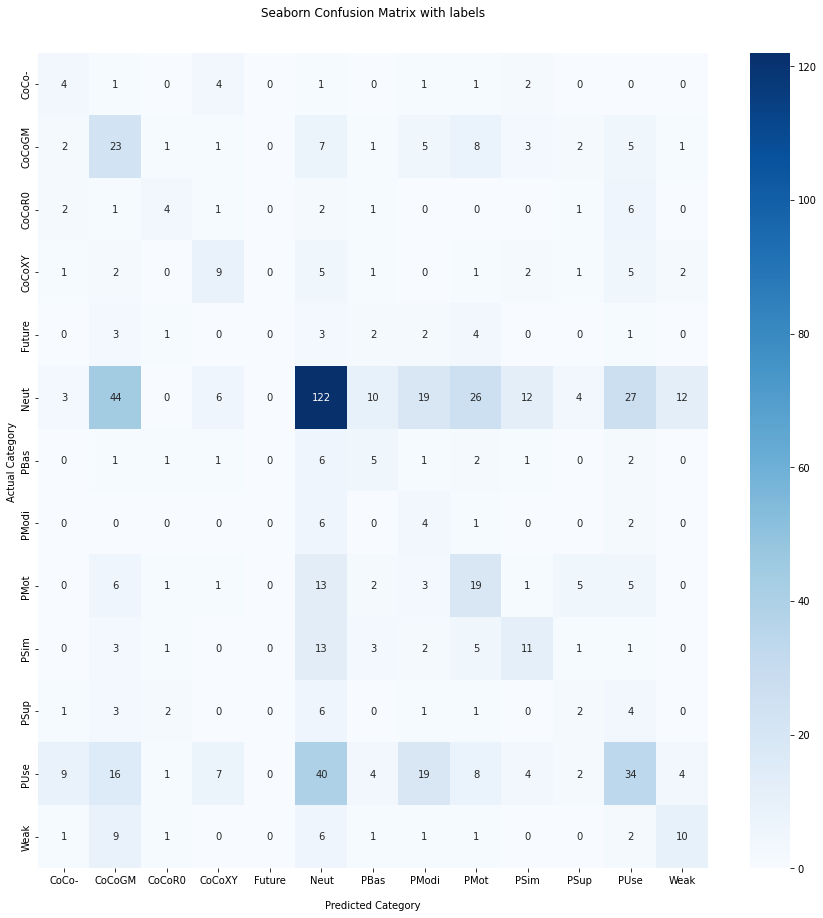

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"])
ax.yaxis.set_ticklabels(["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
#f you could append that attentive sentence vector to CITSEG and send the new feature vector to classification
import torch
import torch.nn as nn
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
class Attention(nn.Module):
    def __init__(self, feature_dim, step_dim, bias=True, **kwargs):
        super(Attention, self).__init__(**kwargs)
        
        self.supports_masking = True

        self.bias = bias
        self.feature_dim = feature_dim
        self.step_dim = step_dim
        self.features_dim = 0
        
        weight = torch.zeros(feature_dim, 1)
        nn.init.kaiming_uniform_(weight)
        self.weight = nn.Parameter(weight)
        
        if bias:
            self.b = nn.Parameter(torch.zeros(step_dim))
        
    def forward(self, x, mask=None):
        # print("x.shape")
        # print(x.shape)
        feature_dim = self.feature_dim 
        # print(feature_dim)
        step_dim = self.step_dim
        # print(step_dim)

        eij = torch.mm(x.contiguous().view(-1, feature_dim), self.weight).view(-1, step_dim)
        # print("eij.shape")
        # print(eij.shape)
        
        if self.bias:
            eij = eij + self.b
            
        eij = torch.tanh(eij)
        a = torch.exp(eij)
        
        if mask is not None:
            a = a * mask

        a = a / (torch.sum(a, 1, keepdim=True) + 1e-10)

        weighted_input = x * torch.unsqueeze(a, -1)
        sum= torch.sum(weighted_input, 1)
        return sum

class CitationClassifier(nn.Module):
    def __init__(self, embedding_size, num_embeddings, num_layers, 
                 hidden_dim, num_classes, dropout_p, 
                 pretrained_embeddings=None, padding_idx=0):
      
        """
        Args:
            embedding_size (int): size of the embedding vectors
            num_embeddings (int): number of embedding vectors
            hidden_dim (int): the size of the hidden dimension
            num_classes (int): the number of classes in classification
            dropout_p (float): a dropout parameter 
            pretrained_embeddings (numpy.array): previously trained word embeddings
                default is None. If provided, 
            padding_idx (int): an index representing a null position
        """
        super(CitationClassifier, self).__init__()
        self.hidden_dim = hidden_dim

        if pretrained_embeddings is None:

            self.emb = nn.Embedding(embedding_dim=embedding_size,
                                    num_embeddings=num_embeddings,
                                    padding_idx=padding_idx)        
        else:
            pretrained_embeddings = torch.from_numpy(pretrained_embeddings).float()
            self.emb = nn.Embedding(embedding_dim=embedding_size,
                                    num_embeddings=num_embeddings,
                                    padding_idx=padding_idx,
                                    _weight=pretrained_embeddings)
        
        self.lstm = nn.LSTM(embedding_size, hidden_dim,num_layers, bidirectional=True, batch_first=True)
        self.attention_layer = Attention(hidden_dim*2, 193)
        self.fc1 = nn.Linear(hidden_dim*4, 50)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(50, num_classes)
        self.act=nn.Softmax()
        


    def forward(self, x_in, citseg_id, apply_softmax=False):
        """The forward pass of the classifier
        
        Args:
            x_in (torch.Tensor): an input data tensor. 
                x_in.shape should be (batch, dataset._max_seq_length)
            apply_softmax (bool): a flag for the softmax activation
                should be false if used with the Cross Entropy losses
        Returns:
            the resulting tensor. tensor.shape should be (batch, num_classes)
        """
        batch_size = x_in.size(0)
        seq_length =  x_in.size(1)
        h_embedding = self.emb(x_in)
        # print(h_embedding.shape) 
        packed_output, (hidden, cell) = self.lstm(h_embedding)
        packed_output1 = self.attention_layer(packed_output)
        packed_output2 = packed_output[torch.arange(packed_output.size(0)),citseg_id.long()]
        #packed_output1=packed_output1.view(30,1)
        att_citeseg=torch.cat([packed_output1,packed_output2],dim=1)
        out = self.fc1(att_citeseg)
        # print(out.shape)
        out = self.relu(out)
        # print(out.shape)
        out = self.fc2(out)
        # print(out.shape)
        pred1= self.act(out)
        # print(pred1.shape)
        return pred1

In [ ]:
classifier = CitationClassifier(embedding_size=args.embedding_size, 
                            num_embeddings=len(vectorizer.title_vocab),
                            num_layers=args.num_layers,
                            hidden_dim=args.hidden_dim, 
                            num_classes=len(vectorizer.category_vocab), 
                            dropout_p=args.dropout_p,
                            pretrained_embeddings=embeddings,
                            padding_idx=0)

print(classifier)

CitationClassifier(
  (emb): Embedding(7632, 300, padding_idx=0)
  (lstm): LSTM(300, 32, num_layers=2, batch_first=True, bidirectional=True)
  (attention_layer): Attention()
  (fc1): Linear(in_features=128, out_features=50, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=50, out_features=13, bias=True)
  (act): Softmax(dim=None)
)


In [ ]:
predictions=[]
prediction=[]
y=[]
classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
    
loss_func = nn.CrossEntropyLoss(dataset.class_weights)
optimizer = optim.RMSprop(classifier.parameters(), lr=args.learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,
                                           mode='min', factor=0.5,
                                           patience=1)

train_state = make_train_state(args)

epoch_bar = tqdm_notebook(desc='training routine', 
                          total=args.num_epochs,
                          position=0)

dataset.set_split('train')
train_bar = tqdm_notebook(desc='split=train',
                          total=dataset.get_num_batches(args.batch_size), 
                          position=1, 
                          leave=True)
dataset.set_split('val')
val_bar = tqdm_notebook(desc='split=val',
                        total=dataset.get_num_batches(args.batch_size), 
                        position=1, 
                        leave=True)

try:
    for epoch_index in range(args.num_epochs):
        train_state['epoch_index'] = epoch_index

        # Iterate over training dataset

        # setup: batch generator, set loss and acc to 0, set train mode on

        dataset.set_split('train')
        batch_generator = generate_batches(dataset, 
                                           batch_size=args.batch_size, 
                                           device=args.device)
        running_loss = 0.0
        running_acc = 0.0
        classifier.train()

        for batch_index, batch_dict in enumerate(batch_generator):
            # the training routine is these 5 steps:

            # --------------------------------------
            # step 1. zero the gradients
            optimizer.zero_grad()
            # step 2. compute the output
            y_pred = classifier(batch_dict['x_data'],batch_dict['citseg_id'])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict['y_target'])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            # step 4. use loss to produce gradients
            loss.backward()

            # step 5. use optimizer to take gradient step
            optimizer.step()
            # -----------------------------------------
            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict['y_target'])
            running_acc += (acc_t - running_acc) / (batch_index + 1)

            # update bar
            train_bar.set_postfix(loss=running_loss, acc=running_acc, 
                                  epoch=epoch_index)
            train_bar.update()

        train_state['train_loss'].append(running_loss)
        train_state['train_acc'].append(running_acc)

        # Iterate over val dataset

        # setup: batch generator, set loss and acc to 0; set eval mode on
        dataset.set_split('val')
        batch_generator = generate_batches(dataset, 
                                           batch_size=args.batch_size, 
                                           device=args.device)
        running_loss = 0.
        running_acc = 0.
        classifier.eval()

        for batch_index, batch_dict in enumerate(batch_generator):

            # compute the output
            y_pred =  classifier(batch_dict['x_data'],batch_dict['citseg_id'])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict['y_target'])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            _, predictions = y_pred.max(dim=1)
            prediction.append(predictions)
            y.append(batch_dict['y_target'])

            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict['y_target'])
            
            running_acc += (acc_t - running_acc) / (batch_index + 1)
            val_bar.set_postfix(loss=running_loss, acc=running_acc, 
                            epoch=epoch_index)
            val_bar.update()
        print('Epoch {}\t val_loss={}\t val_acc={}'.format(epoch_index, running_loss, running_acc))

        train_state['val_loss'].append(running_loss)
        train_state['val_acc'].append(running_acc)
        # print("Test loss: {};".format(train_state['val_loss']))
        # print("Test Accuracy: {}".format(train_state['val_acc']))

        train_state = update_train_state(args=args, model=classifier,
                                         train_state=train_state)

        scheduler.step(train_state['val_loss'][-1])

        if train_state['stop_early']:
            break

        train_bar.n = 0
        val_bar.n = 0
        epoch_bar.update()
except KeyboardInterrupt:
    print("Exiting loop")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


training routine:   0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=train:   0%|          | 0/83 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=val:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 0	 val_loss=2.5611105251312254	 val_acc=7.333333333333336
Epoch 1	 val_loss=2.5370247554779057	 val_acc=6.4
Epoch 2	 val_loss=2.4945887565612797	 val_acc=15.6
Epoch 3	 val_loss=2.4709755420684814	 val_acc=13.866666666666667
Epoch 4	 val_loss=2.450065727233887	 val_acc=16.93333333333333
Epoch 5	 val_loss=2.440856523513794	 val_acc=22.4
Epoch 6	 val_loss=2.4219491195678704	 val_acc=20.666666666666668
Epoch 7	 val_loss=2.4217255687713624	 val_acc=25.866666666666664
Epoch 8	 val_loss=2.385429821014404	 val_acc=25.733333333333334
Epoch 9	 val_loss=2.4051571369171136	 val_acc=26.133333333333333
Epoch 10	 val_loss=2.400347547531128	 val_acc=32.800000000000004
Epoch 11	 val_loss=2.373820104598999	 val_acc=30.666666666666668
Epoch 12	 val_loss=2.3636185264587404	 val_acc=33.33333333333334
Epoch 13	 val_loss=2.370010871887207	 val_acc=30.93333333333333
Epoch 14	 val_loss=2.3793426895141594	 val_acc=32.13333333333333
Epoch 15	 val_loss=2.3810547161102296	 val_acc=33.33333333333334
Epoch 16	

In [ ]:
# compute the loss & accuracy on the test set using the best available model

classifier.load_state_dict(torch.load(train_state['model_filename']))

classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
loss_func = nn.CrossEntropyLoss(dataset.class_weights)

dataset.set_split('val')
batch_generator = generate_batches(dataset, 
                                   batch_size=args.batch_size, 
                                   device=args.device)
running_loss = 0.
running_acc = 0.
classifier.eval()
predictions=[]
prediction=[]
y=[]

for batch_index, batch_dict in enumerate(batch_generator):
    # compute the output
    y_pred =  classifier(batch_dict['x_data'],batch_dict['citseg_id'])

    
    # compute the loss
    loss = loss_func(y_pred, batch_dict['y_target'])
    loss_t = loss.item()
    running_loss += (loss_t - running_loss) / (batch_index + 1)
    _, predictions = y_pred.max(dim=1)
    prediction.append(predictions)
    y.append(batch_dict['y_target'])
    # compute the accuracy
    acc_t = compute_accuracy(y_pred, batch_dict['y_target'])
    running_acc += (acc_t - running_acc) / (batch_index + 1)

train_state['test_loss'] = running_loss
train_state['test_acc'] = running_acc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
y_tensor = torch.stack(y)
pred_tensor = torch.stack(prediction)

In [ ]:
true_y=y_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_y.flatten()

In [ ]:
true_y=true_y.flatten()

In [ ]:
from sklearn.metrics import classification_report
target_names = ["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"]
#target_names = ["Future","Neut","PSim","compare_contrast","support"]
print(classification_report(true_y, pred_y, target_names=target_names))

              precision    recall  f1-score   support

       CoCo-       0.06      0.12      0.08        16
      CoCoGM       0.14      0.17      0.15        58
      CoCoR0       0.24      0.20      0.22        20
      CoCoXY       0.25      0.43      0.32        30
      Future       0.21      0.35      0.26        17
        Neut       0.59      0.36      0.45       289
        PBas       0.15      0.25      0.19        16
       PModi       0.16      0.36      0.22        11
        PMot       0.18      0.33      0.23        55
        PSim       0.55      0.45      0.49        40
        PSup       0.08      0.15      0.10        20
        PUse       0.48      0.38      0.43       146
        Weak       0.40      0.38      0.39        32

    accuracy                           0.34       750
   macro avg       0.27      0.30      0.27       750
weighted avg       0.42      0.34      0.36       750



In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(true_y, pred_y)

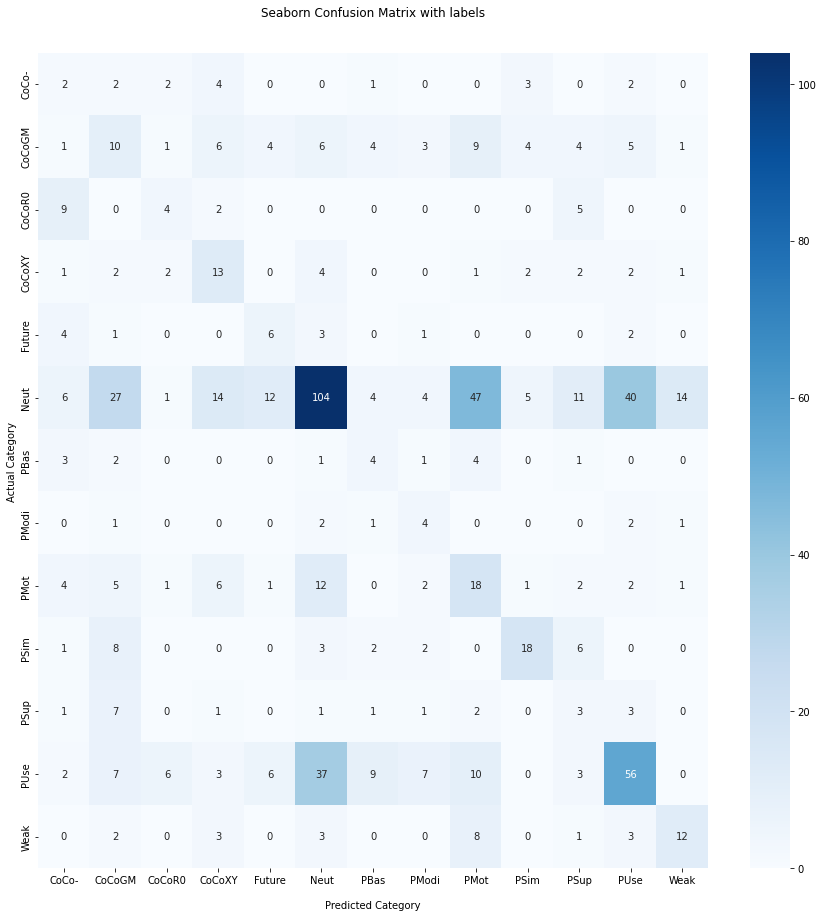

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"])
ax.yaxis.set_ticklabels(["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
#whether you can replace the sentence vector with max pooling of the sentence (as the sentence vector)
import torch
import torch.nn as nn
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
class CitationClassifier1(nn.Module):
    def __init__(self, embedding_size, num_embeddings, num_layers, 
                 hidden_dim, num_classes, dropout_p, 
                 pretrained_embeddings=None, padding_idx=0):
      
        """
        Args:
            embedding_size (int): size of the embedding vectors
            num_embeddings (int): number of embedding vectors
            hidden_dim (int): the size of the hidden dimension
            num_classes (int): the number of classes in classification
            dropout_p (float): a dropout parameter 
            pretrained_embeddings (numpy.array): previously trained word embeddings
                default is None. If provided, 
            padding_idx (int): an index representing a null position
        """
        super(CitationClassifier1, self).__init__()
        self.hidden_dim = hidden_dim

        if pretrained_embeddings is None:

            self.emb = nn.Embedding(embedding_dim=embedding_size,
                                    num_embeddings=num_embeddings,
                                    padding_idx=padding_idx)        
        else:
            pretrained_embeddings = torch.from_numpy(pretrained_embeddings).float()
            self.emb = nn.Embedding(embedding_dim=embedding_size,
                                    num_embeddings=num_embeddings,
                                    padding_idx=padding_idx,
                                    _weight=pretrained_embeddings)
        
        self.lstm = nn.LSTM(embedding_size, hidden_dim,num_layers, bidirectional=True, batch_first=True)
        self.fc1 = nn.Linear(hidden_dim*2, 120)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(120, num_classes)
        self.act=nn.Softmax()
        


    def forward(self, x_in, citseg_id, apply_softmax=False):
        """The forward pass of the classifier
        
        Args:
            x_in (torch.Tensor): an input data tensor. 
                x_in.shape should be (batch, dataset._max_seq_length)
            apply_softmax (bool): a flag for the softmax activation
                should be false if used with the Cross Entropy losses
        Returns:
            the resulting tensor. tensor.shape should be (batch, num_classes)
        """
        a = 0
        z = 192
        batch_size = x_in.size(0)
        h_embedding = self.emb(x_in)

        packed_output, (hidden, cell) = self.lstm(h_embedding)
        packed_output = torch.max(packed_output,1)
        #packed_output=packed_output[torch.arange(packed_output.size(0)),citseg_id.long()]
        out = self.fc1(packed_output)
        out = self.relu(out)
        out = self.fc2(out)
        pred1= self.act(out)
        return pred1

In [ ]:
classifier = CitationClassifier(embedding_size=args.embedding_size, 
                            num_embeddings=len(vectorizer.title_vocab),
                            num_layers=args.num_layers,
                            hidden_dim=args.hidden_dim, 
                            num_classes=len(vectorizer.category_vocab), 
                            dropout_p=args.dropout_p,
                            pretrained_embeddings=embeddings,
                            padding_idx=0)

print(classifier)

CitationClassifier(
  (emb): Embedding(7632, 300, padding_idx=0)
  (lstm): LSTM(300, 32, num_layers=2, batch_first=True, bidirectional=True)
  (attention_layer): Attention()
  (fc1): Linear(in_features=128, out_features=50, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=50, out_features=13, bias=True)
  (act): Softmax(dim=None)
)


In [ ]:
predictions=[]
prediction=[]
y=[]
classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
    
loss_func = nn.CrossEntropyLoss(dataset.class_weights)
optimizer = optim.RMSprop(classifier.parameters(), lr=args.learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,
                                           mode='min', factor=0.5,
                                           patience=1)

train_state = make_train_state(args)

epoch_bar = tqdm_notebook(desc='training routine', 
                          total=args.num_epochs,
                          position=0)

dataset.set_split('train')
train_bar = tqdm_notebook(desc='split=train',
                          total=dataset.get_num_batches(args.batch_size), 
                          position=1, 
                          leave=True)
dataset.set_split('val')
val_bar = tqdm_notebook(desc='split=val',
                        total=dataset.get_num_batches(args.batch_size), 
                        position=1, 
                        leave=True)

try:
    for epoch_index in range(args.num_epochs):
        train_state['epoch_index'] = epoch_index

        # Iterate over training dataset

        # setup: batch generator, set loss and acc to 0, set train mode on

        dataset.set_split('train')
        batch_generator = generate_batches(dataset, 
                                           batch_size=args.batch_size, 
                                           device=args.device)
        running_loss = 0.0
        running_acc = 0.0
        classifier.train()

        for batch_index, batch_dict in enumerate(batch_generator):
            # the training routine is these 5 steps:

            # --------------------------------------
            # step 1. zero the gradients
            optimizer.zero_grad()
            # step 2. compute the output
            y_pred = classifier(batch_dict['x_data'],batch_dict['citseg_id'])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict['y_target'])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            # step 4. use loss to produce gradients
            loss.backward()

            # step 5. use optimizer to take gradient step
            optimizer.step()
            # -----------------------------------------
            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict['y_target'])
            running_acc += (acc_t - running_acc) / (batch_index + 1)

            # update bar
            train_bar.set_postfix(loss=running_loss, acc=running_acc, 
                                  epoch=epoch_index)
            train_bar.update()

        train_state['train_loss'].append(running_loss)
        train_state['train_acc'].append(running_acc)

        # Iterate over val dataset

        # setup: batch generator, set loss and acc to 0; set eval mode on
        dataset.set_split('val')
        batch_generator = generate_batches(dataset, 
                                           batch_size=args.batch_size, 
                                           device=args.device)
        running_loss = 0.
        running_acc = 0.
        classifier.eval()

        for batch_index, batch_dict in enumerate(batch_generator):

            # compute the output
            y_pred =  classifier(batch_dict['x_data'],batch_dict['citseg_id'])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict['y_target'])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            _, predictions = y_pred.max(dim=1)
            prediction.append(predictions)
            y.append(batch_dict['y_target'])

            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict['y_target'])
            
            running_acc += (acc_t - running_acc) / (batch_index + 1)
            val_bar.set_postfix(loss=running_loss, acc=running_acc, 
                            epoch=epoch_index)
            val_bar.update()
        print('Epoch {}\t val_loss={}\t val_acc={}'.format(epoch_index, running_loss, running_acc))

        train_state['val_loss'].append(running_loss)
        train_state['val_acc'].append(running_acc)
        # print("Test loss: {};".format(train_state['val_loss']))
        # print("Test Accuracy: {}".format(train_state['val_acc']))

        train_state = update_train_state(args=args, model=classifier,
                                         train_state=train_state)

        scheduler.step(train_state['val_loss'][-1])

        if train_state['stop_early']:
            break

        train_bar.n = 0
        val_bar.n = 0
        epoch_bar.update()
except KeyboardInterrupt:
    print("Exiting loop")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


training routine:   0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=train:   0%|          | 0/83 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=val:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 0	 val_loss=2.5479055881500248	 val_acc=7.733333333333333
Epoch 1	 val_loss=2.53611252784729	 val_acc=8.933333333333332
Epoch 2	 val_loss=2.5261680412292478	 val_acc=7.7333333333333325
Epoch 3	 val_loss=2.5233880138397216	 val_acc=8.800000000000002
Epoch 4	 val_loss=2.5208946418762204	 val_acc=8.533333333333333
Epoch 5	 val_loss=2.515271263122558	 val_acc=10.933333333333334
Epoch 6	 val_loss=2.494682273864746	 val_acc=11.066666666666666
Epoch 7	 val_loss=2.49567455291748	 val_acc=10.666666666666666
Epoch 8	 val_loss=2.4921273517608644	 val_acc=11.466666666666667
Epoch 9	 val_loss=2.462998762130737	 val_acc=13.333333333333334
Epoch 10	 val_loss=2.481070604324341	 val_acc=10.4
Epoch 11	 val_loss=2.467347507476807	 val_acc=12.0
Epoch 12	 val_loss=2.453859395980835	 val_acc=12.533333333333333
Epoch 13	 val_loss=2.4386006450653075	 val_acc=13.333333333333332
Epoch 14	 val_loss=2.4366545581817634	 val_acc=13.333333333333332
Epoch 15	 val_loss=2.436551675796509	 val_acc=13.2000000000000

In [ ]:
# compute the loss & accuracy on the test set using the best available model

classifier.load_state_dict(torch.load(train_state['model_filename']))

classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
loss_func = nn.CrossEntropyLoss(dataset.class_weights)

dataset.set_split('val')
batch_generator = generate_batches(dataset, 
                                   batch_size=args.batch_size, 
                                   device=args.device)
running_loss = 0.
running_acc = 0.
classifier.eval()
predictions=[]
prediction=[]
y=[]

for batch_index, batch_dict in enumerate(batch_generator):
    # compute the output
    y_pred =  classifier(batch_dict['x_data'],batch_dict['citseg_id'])

    
    # compute the loss
    loss = loss_func(y_pred, batch_dict['y_target'])
    loss_t = loss.item()
    running_loss += (loss_t - running_loss) / (batch_index + 1)
    _, predictions = y_pred.max(dim=1)
    prediction.append(predictions)
    y.append(batch_dict['y_target'])
    # compute the accuracy
    acc_t = compute_accuracy(y_pred, batch_dict['y_target'])
    running_acc += (acc_t - running_acc) / (batch_index + 1)

train_state['test_loss'] = running_loss
train_state['test_acc'] = running_acc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
y_tensor = torch.stack(y)
pred_tensor = torch.stack(prediction)

In [ ]:
true_y=y_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_y.flatten()

In [ ]:
true_y=true_y.flatten()

In [ ]:
from sklearn.metrics import classification_report
target_names = ["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"]
#target_names = ["Future","Neut","PSim","compare_contrast","support"]
print(classification_report(true_y, pred_y, target_names=target_names))

              precision    recall  f1-score   support

       CoCo-       0.00      0.00      0.00        16
      CoCoGM       0.10      0.37      0.16        60
      CoCoR0       0.10      0.32      0.15        19
      CoCoXY       0.11      0.42      0.18        31
      Future       0.00      0.00      0.00        13
        Neut       0.50      0.00      0.01       282
        PBas       0.14      0.35      0.20        20
       PModi       0.14      0.38      0.20        13
        PMot       0.20      0.47      0.28        57
        PSim       0.38      0.45      0.41        42
        PSup       0.12      0.32      0.17        19
        PUse       0.00      0.00      0.00       147
        Weak       0.23      0.23      0.23        31

    accuracy                           0.15       750
   macro avg       0.16      0.25      0.15       750
weighted avg       0.26      0.15      0.09       750



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(true_y, pred_y)

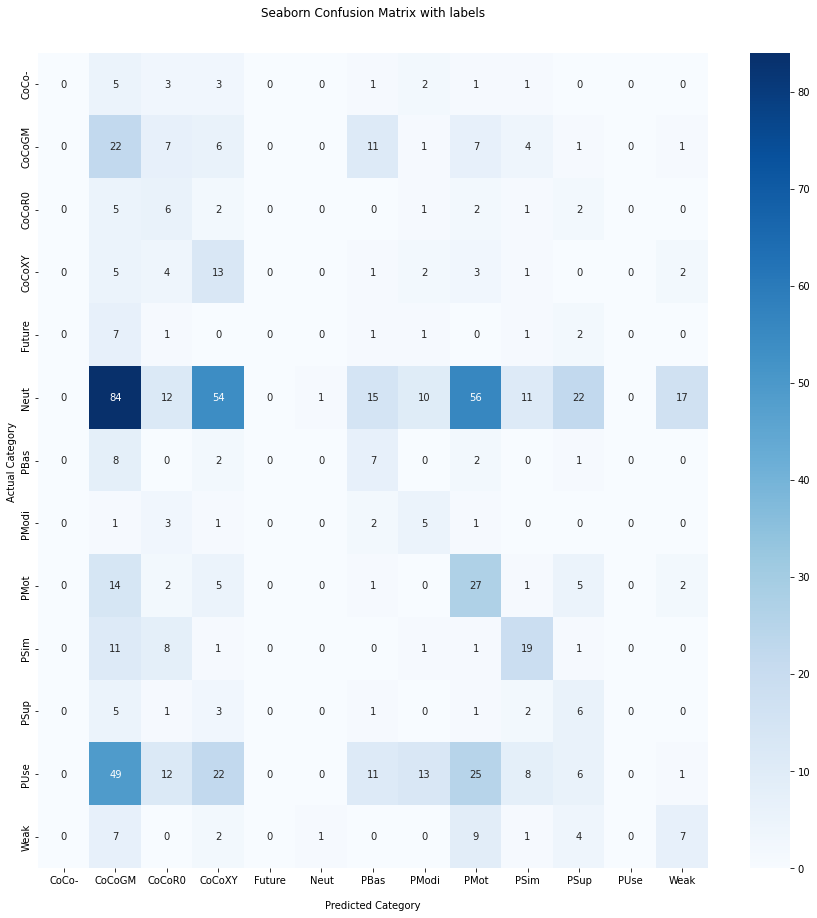

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"])
ax.yaxis.set_ticklabels(["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
#attention weight of only citeseg vector
import torch
import torch.nn as nn
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
class Attention(nn.Module):
    def __init__(self, feature_dim, step_dim, bias=True, **kwargs):
        super(Attention, self).__init__(**kwargs)
        
        self.supports_masking = True

        self.bias = bias
        self.feature_dim = feature_dim
        self.step_dim = step_dim
        self.features_dim = 0
        
        weight = torch.zeros(feature_dim, 1)
        nn.init.kaiming_uniform_(weight)
        self.weight = nn.Parameter(weight)
        
        if bias:
            self.b = nn.Parameter(torch.zeros(step_dim))
        
    def forward(self, x, mask=None):
        # print("x.shape")
        # print(x.shape)
        feature_dim = self.feature_dim 
        # print(feature_dim)
        step_dim = self.step_dim
        # print(step_dim)

        eij = torch.mm(x.contiguous().view(-1, feature_dim), self.weight).view(-1, step_dim)
        # print("eij.shape")
        # print(eij.shape)
        
        if self.bias:
            eij = eij + self.b
            
        eij = torch.tanh(eij)
        a = torch.exp(eij)
        
        if mask is not None:
            a = a * mask

        a = a / (torch.sum(a, 1, keepdim=True) + 1e-10)

        weighted_input = x * torch.unsqueeze(a, -1)
        #sum= torch.sum(weighted_input, 1)
        return weighted_input

class CitationClassifier(nn.Module):
    def __init__(self, embedding_size, num_embeddings, num_layers, 
                 hidden_dim, num_classes, dropout_p, 
                 pretrained_embeddings=None, padding_idx=0):
      
        """
        Args:
            embedding_size (int): size of the embedding vectors
            num_embeddings (int): number of embedding vectors
            hidden_dim (int): the size of the hidden dimension
            num_classes (int): the number of classes in classification
            dropout_p (float): a dropout parameter 
            pretrained_embeddings (numpy.array): previously trained word embeddings
                default is None. If provided, 
            padding_idx (int): an index representing a null position
        """
        super(CitationClassifier, self).__init__()
        self.hidden_dim = hidden_dim

        if pretrained_embeddings is None:

            self.emb = nn.Embedding(embedding_dim=embedding_size,
                                    num_embeddings=num_embeddings,
                                    padding_idx=padding_idx)        
        else:
            pretrained_embeddings = torch.from_numpy(pretrained_embeddings).float()
            self.emb = nn.Embedding(embedding_dim=embedding_size,
                                    num_embeddings=num_embeddings,
                                    padding_idx=padding_idx,
                                    _weight=pretrained_embeddings)
        
        self.lstm = nn.LSTM(embedding_size, hidden_dim,num_layers, bidirectional=True, batch_first=True)
        self.attention_layer = Attention(hidden_dim*2, 193)
        self.fc1 = nn.Linear(hidden_dim*2, 50)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(50, num_classes)
        self.act=nn.Softmax()
        


    def forward(self, x_in, citseg_id, apply_softmax=False):
        """The forward pass of the classifier
        
        Args:
            x_in (torch.Tensor): an input data tensor. 
                x_in.shape should be (batch, dataset._max_seq_length)
            apply_softmax (bool): a flag for the softmax activation
                should be false if used with the Cross Entropy losses
        Returns:
            the resulting tensor. tensor.shape should be (batch, num_classes)
        """
        batch_size = x_in.size(0)
        seq_length =  x_in.size(1)
        h_embedding = self.emb(x_in)
        # print(h_embedding.shape) 
        packed_output, (hidden, cell) = self.lstm(h_embedding)
        # print(packed_output.shape)
        packed_output = self.attention_layer(packed_output)
        packed_output = packed_output[torch.arange(packed_output.size(0)),citseg_id.long()]
        #h_1h_n=torch.cat([packed_output,packed_output1],dim=1)
        out = self.fc1(packed_output)
        # print(out.shape)
        out = self.relu(out)
        # print(out.shape)
        out = self.fc2(out)
        # print(out.shape)
        pred1= self.act(out)
        # print(pred1.shape)
        return pred1

In [ ]:
classifier = CitationClassifier(embedding_size=args.embedding_size, 
                            num_embeddings=len(vectorizer.title_vocab),
                            num_layers=args.num_layers,
                            hidden_dim=args.hidden_dim, 
                            num_classes=len(vectorizer.category_vocab), 
                            dropout_p=args.dropout_p,
                            pretrained_embeddings=embeddings,
                            padding_idx=0)

print(classifier)

CitationClassifier(
  (emb): Embedding(7632, 300, padding_idx=0)
  (lstm): LSTM(300, 32, num_layers=2, batch_first=True, bidirectional=True)
  (attention_layer): Attention()
  (fc1): Linear(in_features=64, out_features=50, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=50, out_features=13, bias=True)
  (act): Softmax(dim=None)
)


In [ ]:
predictions=[]
prediction=[]
y=[]
classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
    
loss_func = nn.CrossEntropyLoss(dataset.class_weights)
optimizer = optim.RMSprop(classifier.parameters(), lr=args.learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,
                                           mode='min', factor=0.5,
                                           patience=1)

train_state = make_train_state(args)

epoch_bar = tqdm_notebook(desc='training routine', 
                          total=args.num_epochs,
                          position=0)

dataset.set_split('train')
train_bar = tqdm_notebook(desc='split=train',
                          total=dataset.get_num_batches(args.batch_size), 
                          position=1, 
                          leave=True)
dataset.set_split('val')
val_bar = tqdm_notebook(desc='split=val',
                        total=dataset.get_num_batches(args.batch_size), 
                        position=1, 
                        leave=True)

try:
    for epoch_index in range(args.num_epochs):
        train_state['epoch_index'] = epoch_index

        # Iterate over training dataset

        # setup: batch generator, set loss and acc to 0, set train mode on

        dataset.set_split('train')
        batch_generator = generate_batches(dataset, 
                                           batch_size=args.batch_size, 
                                           device=args.device)
        running_loss = 0.0
        running_acc = 0.0
        classifier.train()

        for batch_index, batch_dict in enumerate(batch_generator):
            # the training routine is these 5 steps:

            # --------------------------------------
            # step 1. zero the gradients
            optimizer.zero_grad()
            # step 2. compute the output
            y_pred = classifier(batch_dict['x_data'],batch_dict['citseg_id'])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict['y_target'])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            # step 4. use loss to produce gradients
            loss.backward()

            # step 5. use optimizer to take gradient step
            optimizer.step()
            # -----------------------------------------
            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict['y_target'])
            running_acc += (acc_t - running_acc) / (batch_index + 1)

            # update bar
            train_bar.set_postfix(loss=running_loss, acc=running_acc, 
                                  epoch=epoch_index)
            train_bar.update()

        train_state['train_loss'].append(running_loss)
        train_state['train_acc'].append(running_acc)

        # Iterate over val dataset

        # setup: batch generator, set loss and acc to 0; set eval mode on
        dataset.set_split('val')
        batch_generator = generate_batches(dataset, 
                                           batch_size=args.batch_size, 
                                           device=args.device)
        running_loss = 0.
        running_acc = 0.
        classifier.eval()

        for batch_index, batch_dict in enumerate(batch_generator):

            # compute the output
            y_pred =  classifier(batch_dict['x_data'],batch_dict['citseg_id'])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict['y_target'])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            _, predictions = y_pred.max(dim=1)
            prediction.append(predictions)
            y.append(batch_dict['y_target'])

            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict['y_target'])
            
            running_acc += (acc_t - running_acc) / (batch_index + 1)
            val_bar.set_postfix(loss=running_loss, acc=running_acc, 
                            epoch=epoch_index)
            val_bar.update()
        print('Epoch {}\t val_loss={}\t val_acc={}'.format(epoch_index, running_loss, running_acc))

        train_state['val_loss'].append(running_loss)
        train_state['val_acc'].append(running_acc)
        # print("Test loss: {};".format(train_state['val_loss']))
        # print("Test Accuracy: {}".format(train_state['val_acc']))

        train_state = update_train_state(args=args, model=classifier,
                                         train_state=train_state)

        scheduler.step(train_state['val_loss'][-1])

        if train_state['stop_early']:
            break

        train_bar.n = 0
        val_bar.n = 0
        epoch_bar.update()
except KeyboardInterrupt:
    print("Exiting loop")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


training routine:   0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=train:   0%|          | 0/83 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=val:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 0	 val_loss=2.5646954250335696	 val_acc=3.8666666666666663
Epoch 1	 val_loss=2.5636402988433833	 val_acc=6.4
Epoch 2	 val_loss=2.558933906555176	 val_acc=7.066666666666669
Epoch 3	 val_loss=2.546452980041504	 val_acc=9.866666666666667
Epoch 4	 val_loss=2.54045750617981	 val_acc=7.333333333333333
Epoch 5	 val_loss=2.537522802352905	 val_acc=7.733333333333332
Epoch 6	 val_loss=2.532201461791992	 val_acc=9.733333333333334
Epoch 7	 val_loss=2.528853673934937	 val_acc=7.6000000000000005
Epoch 8	 val_loss=2.5285087490081786	 val_acc=10.4
Epoch 9	 val_loss=2.52037706375122	 val_acc=8.533333333333333
Epoch 10	 val_loss=2.5187084293365483	 val_acc=8.8
Epoch 11	 val_loss=2.5143358039855963	 val_acc=8.266666666666667
Epoch 12	 val_loss=2.512250881195068	 val_acc=7.733333333333334
Epoch 13	 val_loss=2.509090576171875	 val_acc=8.266666666666666
Epoch 14	 val_loss=2.5120221710205084	 val_acc=7.866666666666667
Epoch 15	 val_loss=2.5058229160308843	 val_acc=7.866666666666666
Epoch 16	 val_loss=2

In [ ]:
# compute the loss & accuracy on the test set using the best available model

classifier.load_state_dict(torch.load(train_state['model_filename']))

classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
loss_func = nn.CrossEntropyLoss(dataset.class_weights)

dataset.set_split('val')
batch_generator = generate_batches(dataset, 
                                   batch_size=args.batch_size, 
                                   device=args.device)
running_loss = 0.
running_acc = 0.
classifier.eval()
predictions=[]
prediction=[]
y=[]

for batch_index, batch_dict in enumerate(batch_generator):
    # compute the output
    y_pred =  classifier(batch_dict['x_data'],batch_dict['citseg_id'])

    
    # compute the loss
    loss = loss_func(y_pred, batch_dict['y_target'])
    loss_t = loss.item()
    running_loss += (loss_t - running_loss) / (batch_index + 1)
    _, predictions = y_pred.max(dim=1)
    prediction.append(predictions)
    y.append(batch_dict['y_target'])
    # compute the accuracy
    acc_t = compute_accuracy(y_pred, batch_dict['y_target'])
    running_acc += (acc_t - running_acc) / (batch_index + 1)

train_state['test_loss'] = running_loss
train_state['test_acc'] = running_acc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
y_tensor = torch.stack(y)
pred_tensor = torch.stack(prediction)

In [ ]:
true_y=y_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_y.flatten()

In [ ]:
true_y=true_y.flatten()

In [ ]:
from sklearn.metrics import classification_report
target_names = ["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"]
#target_names = ["Future","Neut","PSim","compare_contrast","support"]
print(classification_report(true_y, pred_y, target_names=target_names))

              precision    recall  f1-score   support

       CoCo-       0.02      0.14      0.03        14
      CoCoGM       0.00      0.00      0.00        57
      CoCoR0       0.00      0.00      0.00        20
      CoCoXY       0.08      0.53      0.14        30
      Future       0.03      0.35      0.06        17
        Neut       0.00      0.00      0.00       288
        PBas       0.04      0.05      0.04        19
       PModi       0.00      0.00      0.00        13
        PMot       0.23      0.26      0.24        54
        PSim       0.42      0.41      0.42        41
        PSup       0.00      0.00      0.00        19
        PUse       0.47      0.37      0.42       147
        Weak       0.30      0.23      0.26        31

    accuracy                           0.16       750
   macro avg       0.12      0.18      0.12       750
weighted avg       0.15      0.16      0.14       750



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(true_y, pred_y)

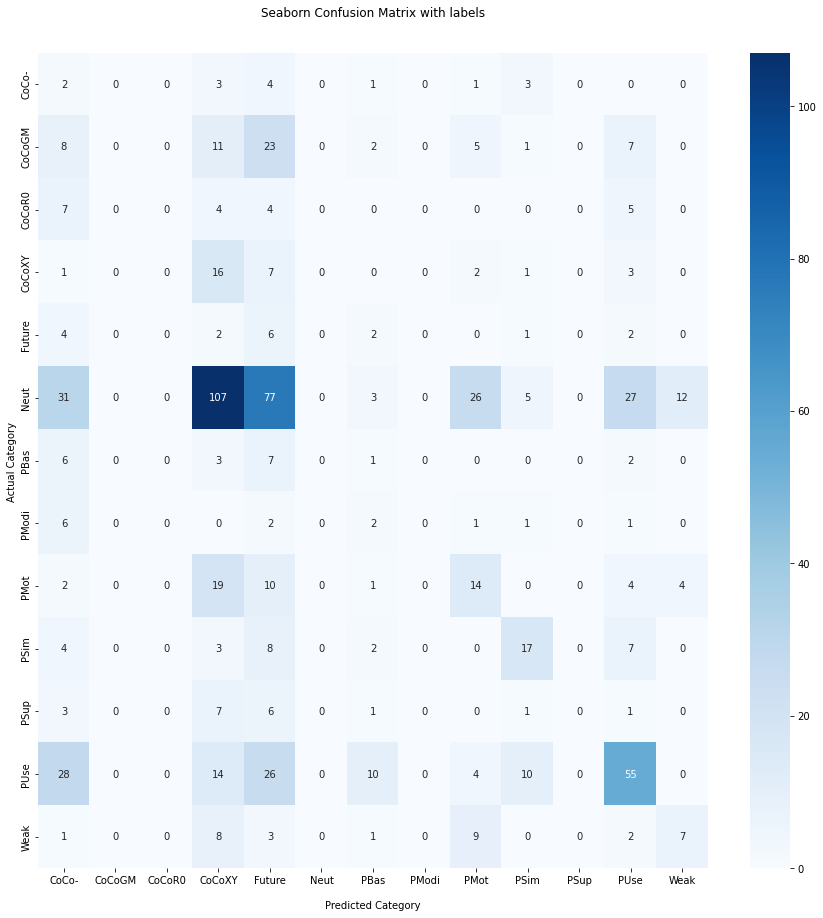

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"])
ax.yaxis.set_ticklabels(["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"])

## Display the visualization of the Confusion Matrix.
plt.show()